In [4]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(car, mokken)

In [3]:
d <- rio::import("data/Myszkowski_Storme_2018.csv")

glimpse(d)

Rows: 499
Columns: 12
$ SPM1  <int> 7, 7, 7, 7, 3, 3, 4, 4, 7, 7, 7, 7, 3, 7, 3, 1, 7, 7, 7, 5, ~
$ SPM2  <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, ~
$ SPM3  <int> 8, 8, 8, 2, 8, 8, 2, 2, 8, 2, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, ~
$ SPM4  <int> 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, ~
$ SPM5  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, ~
$ SPM6  <int> 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5, 5, ~
$ SPM7  <int> 4, 4, 4, 4, 1, 7, 1, 1, 1, 3, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, ~
$ SPM8  <int> 8, 8, 6, 3, 6, 6, 1, 1, 6, 8, 6, 6, 3, 5, 2, 7, 6, 7, 6, 6, ~
$ SPM9  <int> 1, 1, 3, 3, 3, 5, 8, 8, 3, 3, 5, 5, 3, 1, 1, 4, 3, 7, 3, 3, ~
$ SPM10 <int> 5, 5, 2, 4, 2, 8, 5, 5, 2, 4, 4, 4, 6, 2, 7, 6, 2, 4, 3, 3, ~
$ SPM11 <int> 7, 7, 4, 1, 4, 6, 4, 4, 7, 4, 3, 3, 5, 1, 3, 4, 3, 5, 2, 4, ~
$ SPM12 <int> 2, 2, 4, 1, 5, 6, 1, 1, 5, 5, 7, 7, 7, 2, 2, 3, 1, 5, 2, 3, ~


In [32]:
answers <- c(7, 6, 8, 2, 1, 5, 1, 6, 3, 2, 4, 5)
names(answers) <- paste0("SPM", seq_along(answers))

answers

SPM1  SPM2  SPM3  SPM4  SPM5  SPM6  SPM7  SPM8  SPM9 SPM10 SPM11 SPM12 
    7     6     8     2     1     5     1     6     3     2     4     5

In [34]:
spm_long <- d %>%
    mutate(person = seq_len(n())) %>%
    gather("item", "response", SPM1:SPM12) %>%
    mutate(
        answer = answers[item],
        response2 = as.numeric(response == answer),
        item = as.factor(as.numeric(sub("^SPM", "", item)))
    )

head(spm_long)

person item response answer response2
1 1      1    7        7      1        
2 2      1    7        7      1        
3 3      1    7        7      1        
4 4      1    7        7      1        
5 5      1    3        7      0        
6 6      1    3        7      0

In [39]:
spm_wide <- spm_long %>%
    dplyr::select(person, item, response2) %>%
    spread("item", "response2") %>%
    dplyr::select(-person)

spm_wide |> head()

1 2 3 4 5 6 7 8 9 10 11 12
1 1 1 1 0 1 1 0 0 0 0  0  0 
2 1 1 1 0 1 1 0 0 0 0  0  0 
3 1 1 1 1 1 1 0 1 1 1  1  0 
4 1 1 0 1 1 0 0 0 1 0  0  0 
5 0 1 1 1 1 1 1 1 1 1  1  1 
6 0 1 1 1 1 1 0 1 0 0  0  0

In [42]:
names(spm_wide) <- paste0("SPM", 1:12)
spm_wide |> head()

SPM1 SPM2 SPM3 SPM4 SPM5 SPM6 SPM7 SPM8 SPM9 SPM10 SPM11 SPM12
1 1    1    1    0    1    1    0    0    0    0     0     0    
2 1    1    1    0    1    1    0    0    0    0     0     0    
3 1    1    1    1    1    1    0    1    1    1     1     0    
4 1    1    0    1    1    0    0    0    1    0     0     0    
5 0    1    1    1    1    1    1    1    1    1     1     1    
6 0    1    1    1    1    1    0    1    0    0     0     0

In [43]:
out <- check.errors(spm_wide)

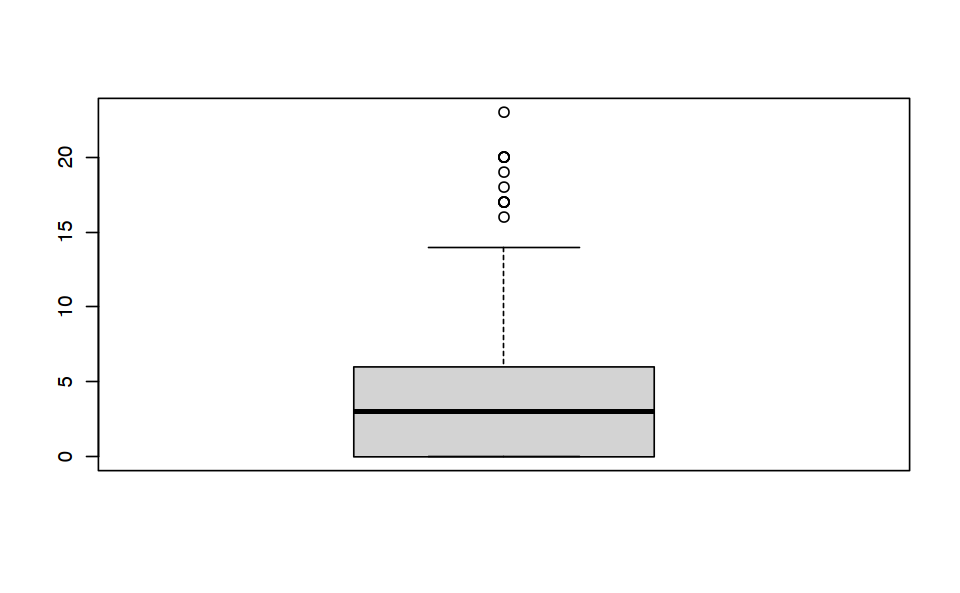

In [44]:
out$Gplus |> boxplot()

In [46]:
# Extract Gplus values
gplus_values <- out$Gplus

# Compute Q1, Q3, and IQR
Q1 <- quantile(gplus_values, 0.25)
Q3 <- quantile(gplus_values, 0.75)
IQR <- Q3 - Q1

# Define the lower and upper bounds
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Identify outliers
outlier_indices <- which(gplus_values < lower_bound | gplus_values > upper_bound)
print(outlier_indices) # Rows flagged as outliers

 [1]  10  47  50  51  52  53 192 243 244 245 246 247 358 489


In [47]:
# Remove outliers from the dataset
spm_clean <- spm_wide[-outlier_indices, ]

In [48]:
result <- coefH(spm_clean)

$Hij
      SPM1    se      SPM2    se      SPM3    se      SPM4    se     
SPM1                   0.616  (0.100)  0.331  (0.064)  0.248  (0.065)
SPM2   0.616  (0.100)                  0.535  (0.098)  0.613  (0.094)
SPM3   0.331  (0.064)  0.535  (0.098)                  0.286  (0.060)
SPM4   0.248  (0.065)  0.613  (0.094)  0.286  (0.060)                
SPM5   0.294  (0.076)  0.493  (0.095)  0.421  (0.072)  0.772  (0.058)
SPM6   0.272  (0.055)  0.511  (0.104)  0.509  (0.062)  0.520  (0.065)
SPM7   0.122  (0.055)  0.544  (0.110)  0.295  (0.069)  0.471  (0.071)
SPM8   0.263  (0.070)  0.647  (0.117)  0.442  (0.080)  0.636  (0.075)
SPM9   0.095  (0.070)  0.393  (0.137)  0.460  (0.080)  0.441  (0.084)
SPM10  0.327  (0.093)  0.709  (0.135)  0.799  (0.071)  0.938  (0.043)
SPM11  0.399  (0.099)  0.664  (0.155)  0.569  (0.105)  0.822  (0.076)
SPM12  0.267  (0.114)  0.717  (0.154)  0.253  (0.135)  0.839  (0.077)
      SPM5    se      SPM6    se      SPM7    se      SPM8    se     
SPM1   0.294  (

In [49]:
# Overall Scalability (H)
result$H

Scale H      se 
  0.469 (0.021) 

In [50]:
# Scalability for each item (Hj)
result$Hi

      Item H  se     
SPM1    0.265 (0.042)
SPM2    0.568 (0.060)
SPM3    0.426 (0.039)
SPM4    0.545 (0.034)
SPM5    0.602 (0.037)
SPM6    0.499 (0.032)
SPM7    0.422 (0.035)
SPM8    0.476 (0.032)
SPM9    0.401 (0.036)
SPM10   0.529 (0.031)
SPM11   0.536 (0.040)
SPM12   0.500 (0.045)

In [51]:
# Scalability for item pairs (Hjk)
result$Hij

      SPM1    se      SPM2    se      SPM3    se      SPM4    se     
SPM1                   0.616  (0.100)  0.331  (0.064)  0.248  (0.065)
SPM2   0.616  (0.100)                  0.535  (0.098)  0.613  (0.094)
SPM3   0.331  (0.064)  0.535  (0.098)                  0.286  (0.060)
SPM4   0.248  (0.065)  0.613  (0.094)  0.286  (0.060)                
SPM5   0.294  (0.076)  0.493  (0.095)  0.421  (0.072)  0.772  (0.058)
SPM6   0.272  (0.055)  0.511  (0.104)  0.509  (0.062)  0.520  (0.065)
SPM7   0.122  (0.055)  0.544  (0.110)  0.295  (0.069)  0.471  (0.071)
SPM8   0.263  (0.070)  0.647  (0.117)  0.442  (0.080)  0.636  (0.075)
SPM9   0.095  (0.070)  0.393  (0.137)  0.460  (0.080)  0.441  (0.084)
SPM10  0.327  (0.093)  0.709  (0.135)  0.799  (0.071)  0.938  (0.043)
SPM11  0.399  (0.099)  0.664  (0.155)  0.569  (0.105)  0.822  (0.076)
SPM12  0.267  (0.114)  0.717  (0.154)  0.253  (0.135)  0.839  (0.077)
      SPM5    se      SPM6    se      SPM7    se      SPM8    se     
SPM1   0.294  (0.076

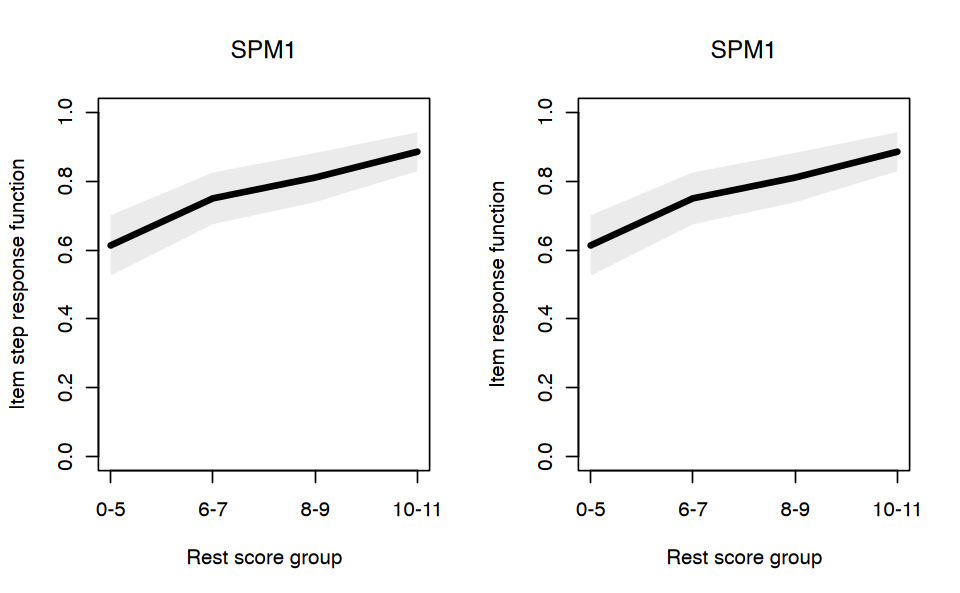

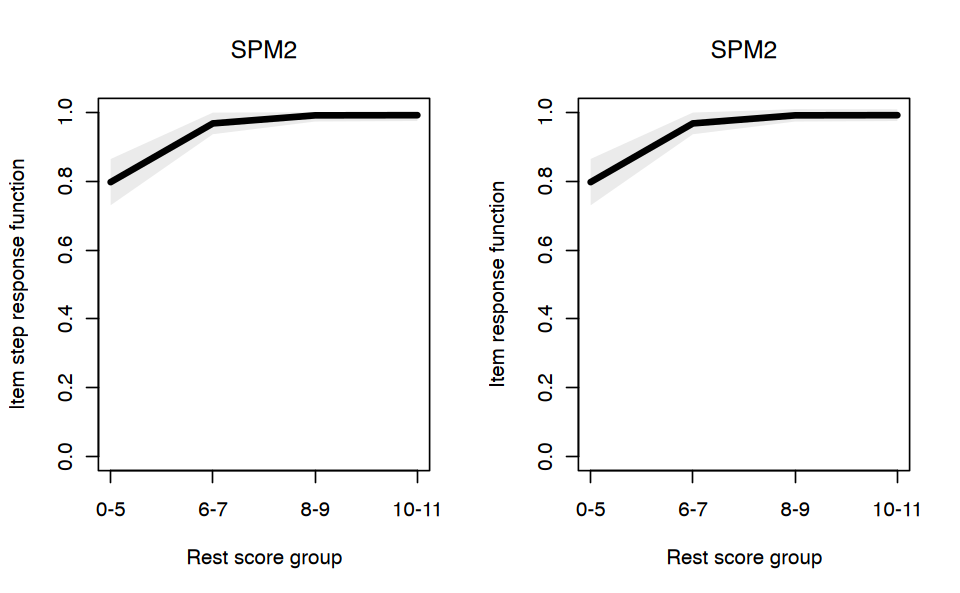

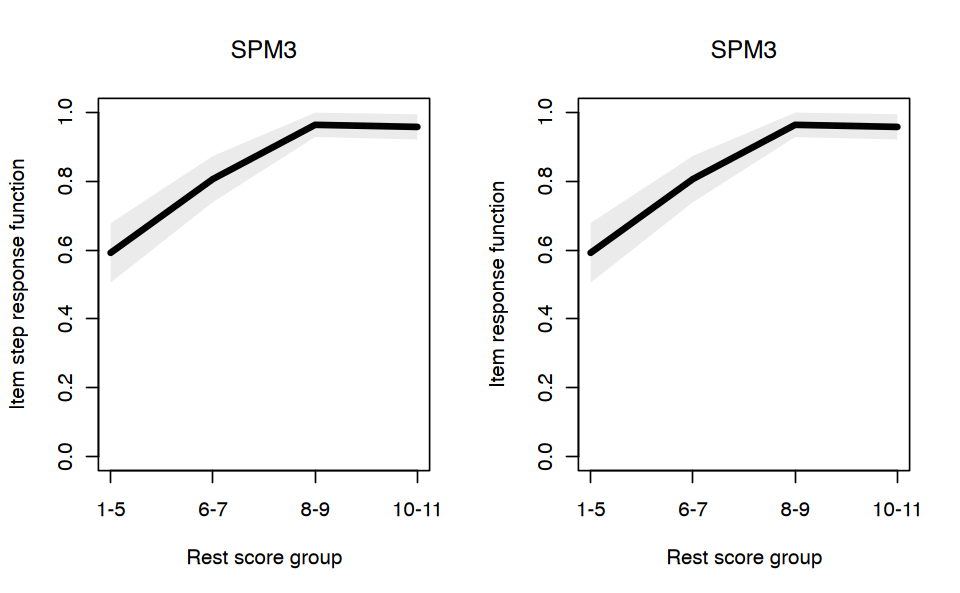

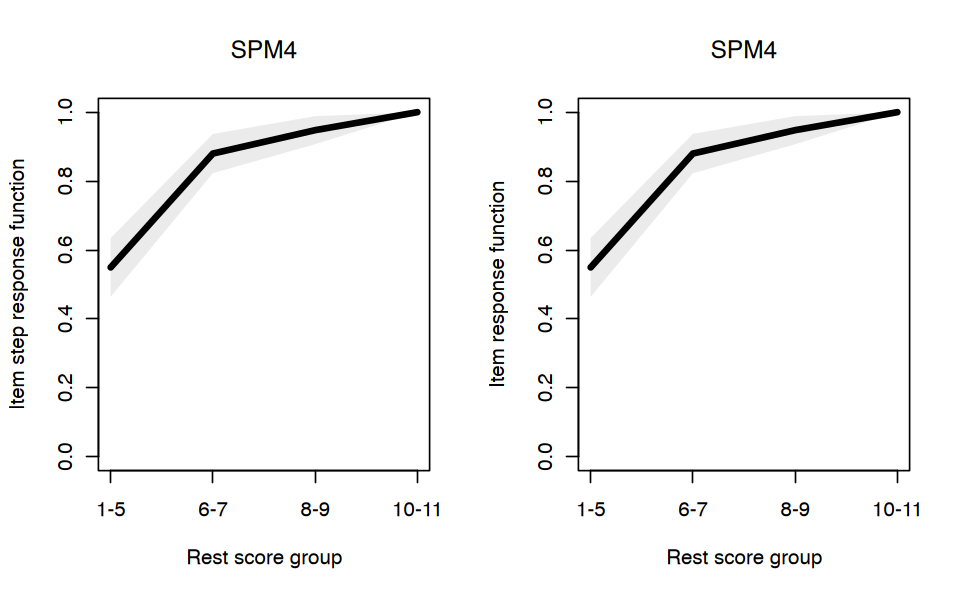

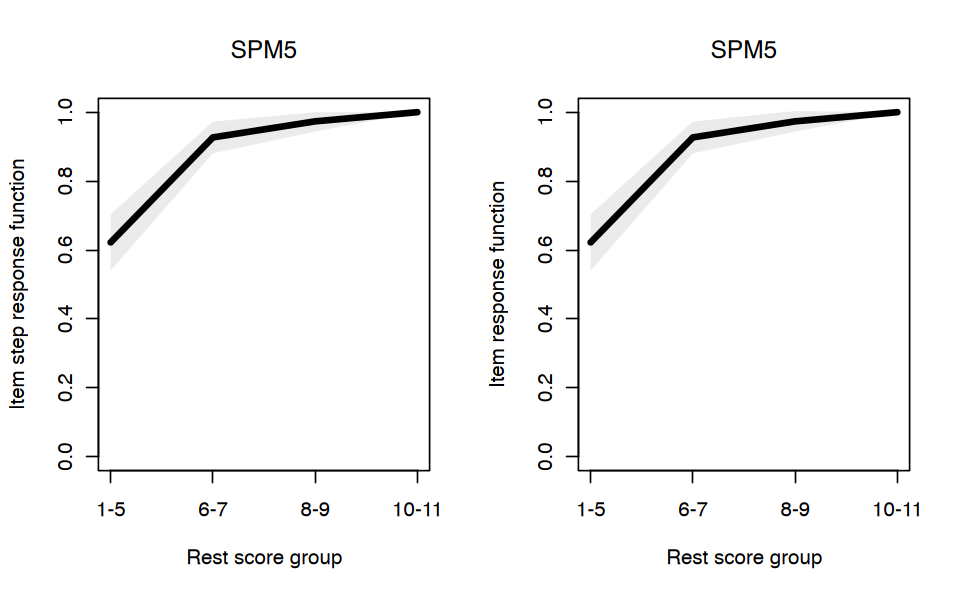

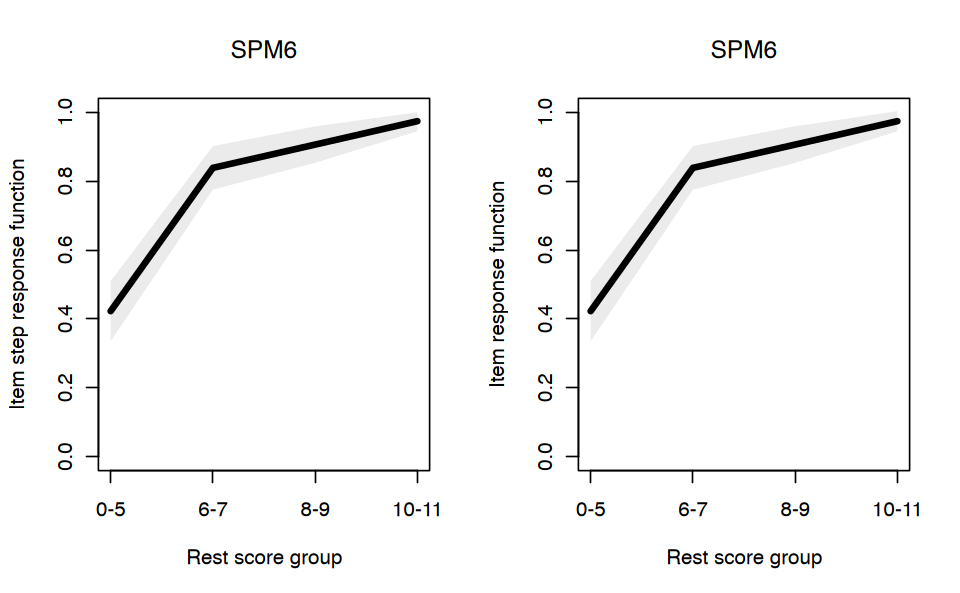

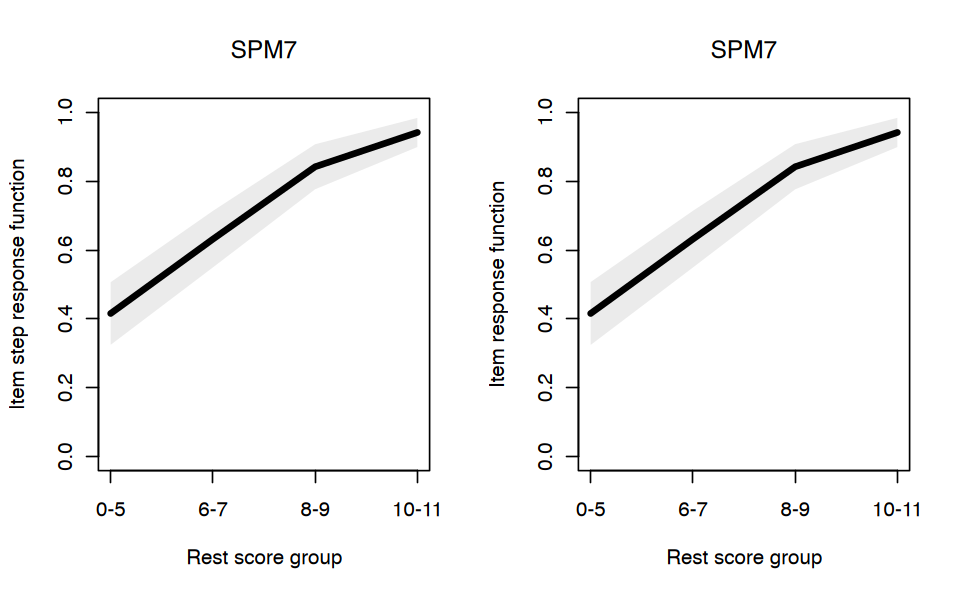

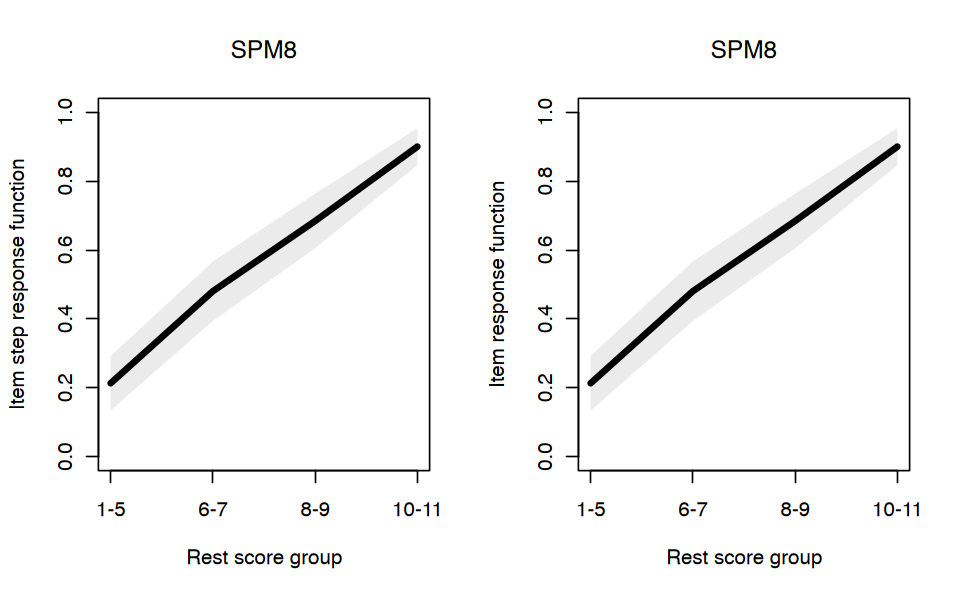

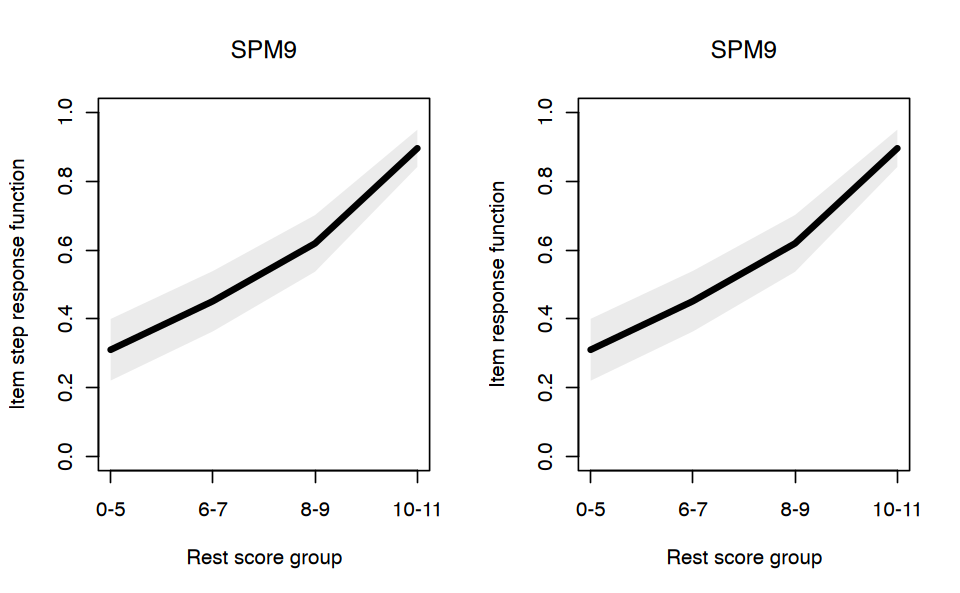

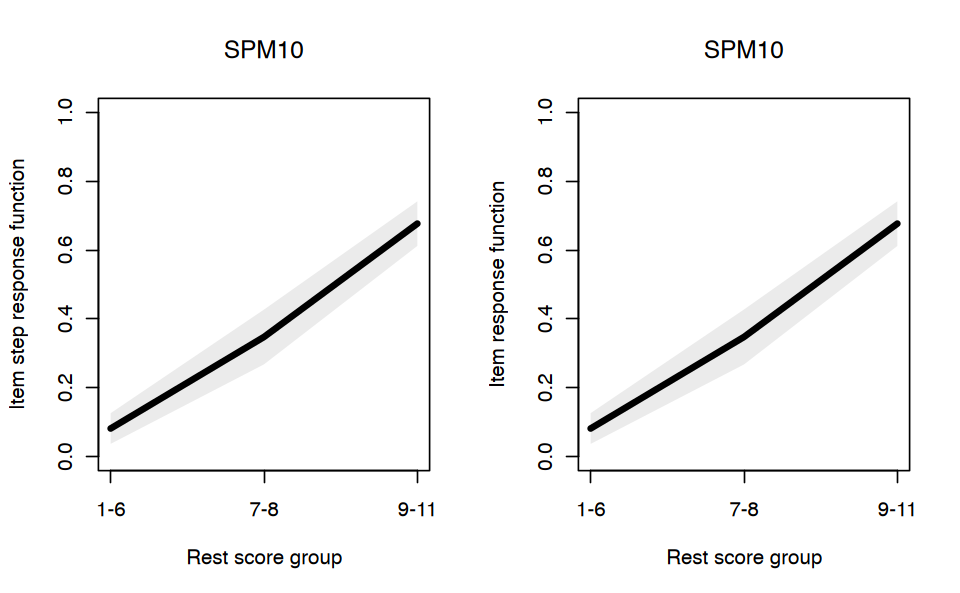

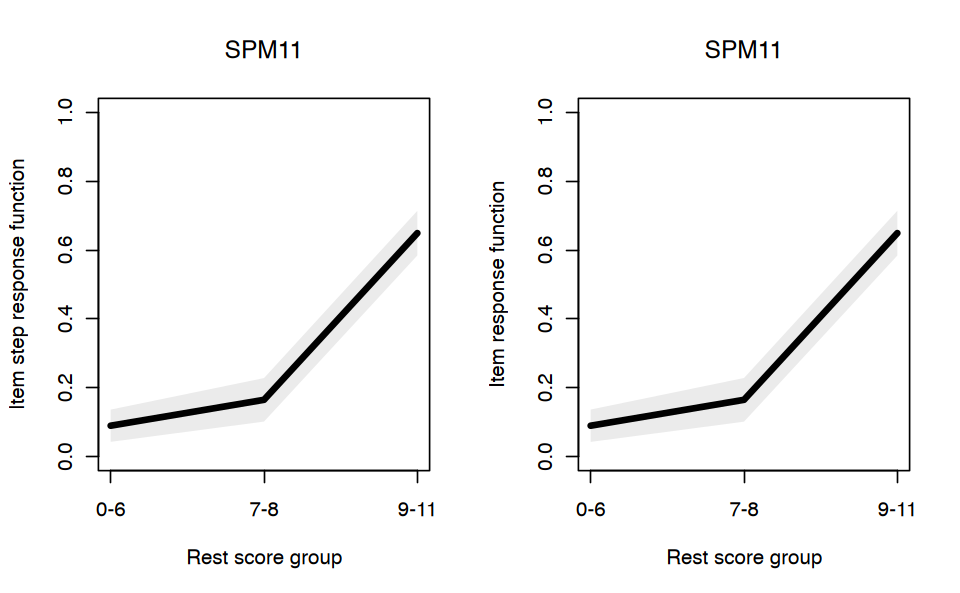

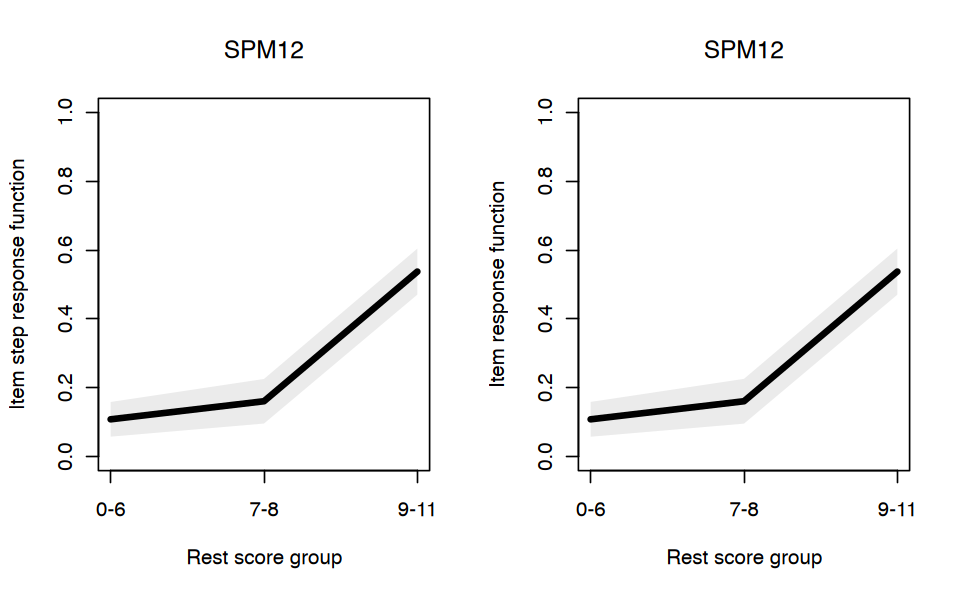

In [66]:
plot(check.monotonicity(spm_clean), item = 1:12)

In [68]:
iio <- check.iio(spm_clean)
summary(iio) |> print()

$method
[1] "MIIO"

$item.summary
      ItemH #ac #vi #vi/#ac maxvi  sum sum/#ac zmax #zsig crit
SPM2   0.57  30   0    0.00  0.00 0.00  0.0000 0.00     0    0
SPM5   0.60  30   1    0.03  0.04 0.04  0.0014 0.62     0    0
SPM4   0.54  28   2    0.07  0.12 0.19  0.0068 1.93     1   42
SPM3   0.43  27   3    0.11  0.07 0.15  0.0056 1.03     0   28
SPM6   0.50  27   2    0.07  0.24 0.27  0.0100 3.67     1   69
SPM1   0.26  27   5    0.19  0.24 0.51  0.0188 3.67     3  118
SPM7   0.42  25   1    0.04  0.06 0.06  0.0025 1.81     1   33
SPM8   0.48  24   1    0.04  0.08 0.08  0.0034 1.43     0   17
SPM9   0.40  24   1    0.04  0.08 0.08  0.0034 1.43     0   21
SPM10  0.53  22   1    0.05  0.03 0.03  0.0014 0.51     0    2
SPM11  0.54  22   1    0.05  0.06 0.06  0.0029 1.16     0   11
SPM12  0.50  22   2    0.09  0.06 0.09  0.0043 1.16     0   20

$backward.selection
      step 1 step 2
SPM2       0      0
SPM5       0      0
SPM4       1      0
SPM3       0      0
SPM6       1      0
SPM1  

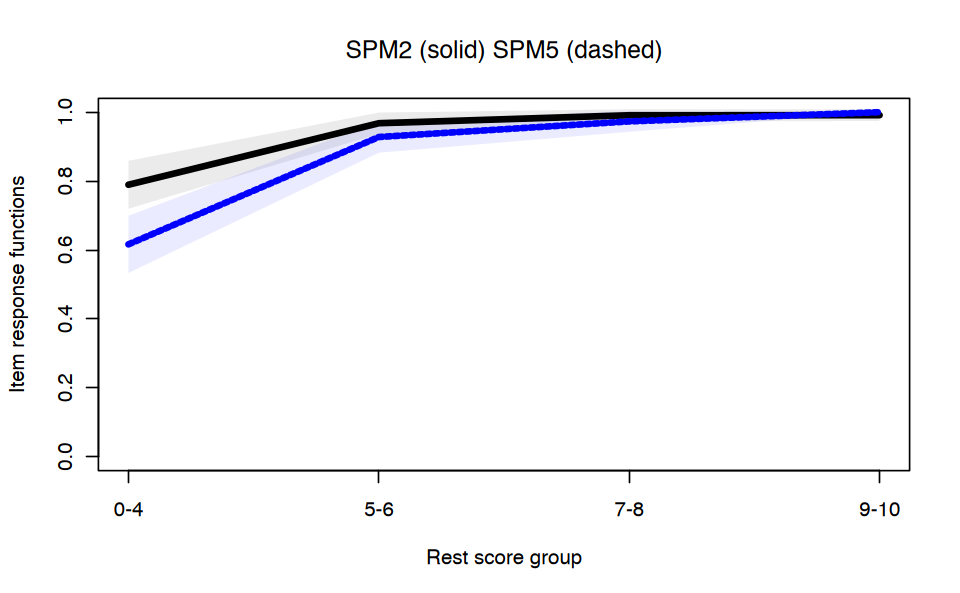

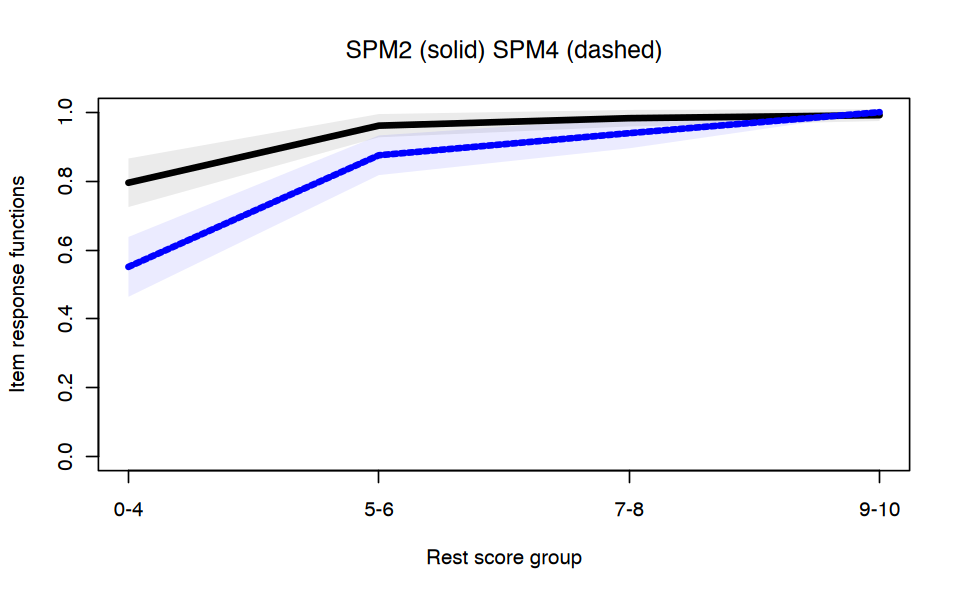

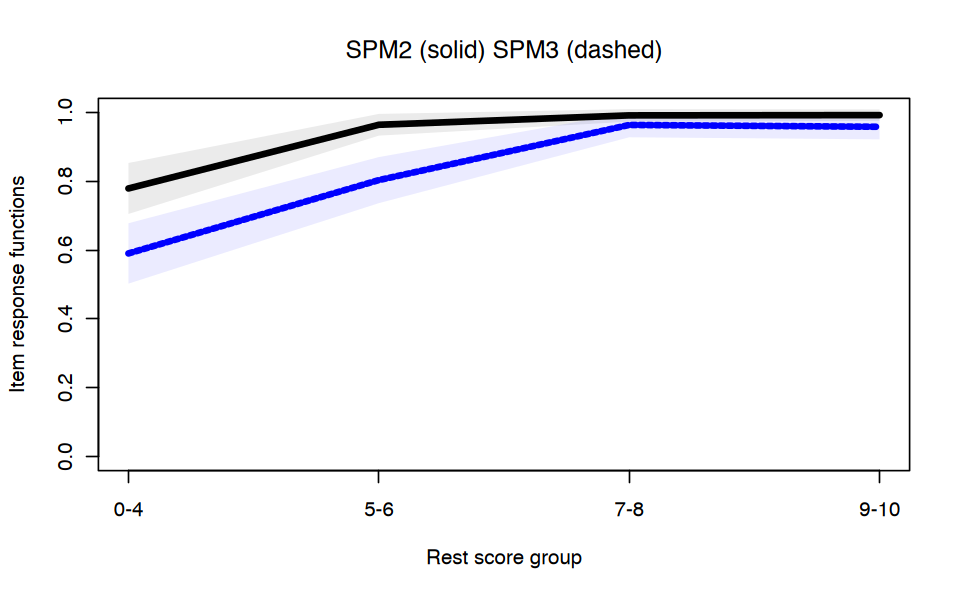

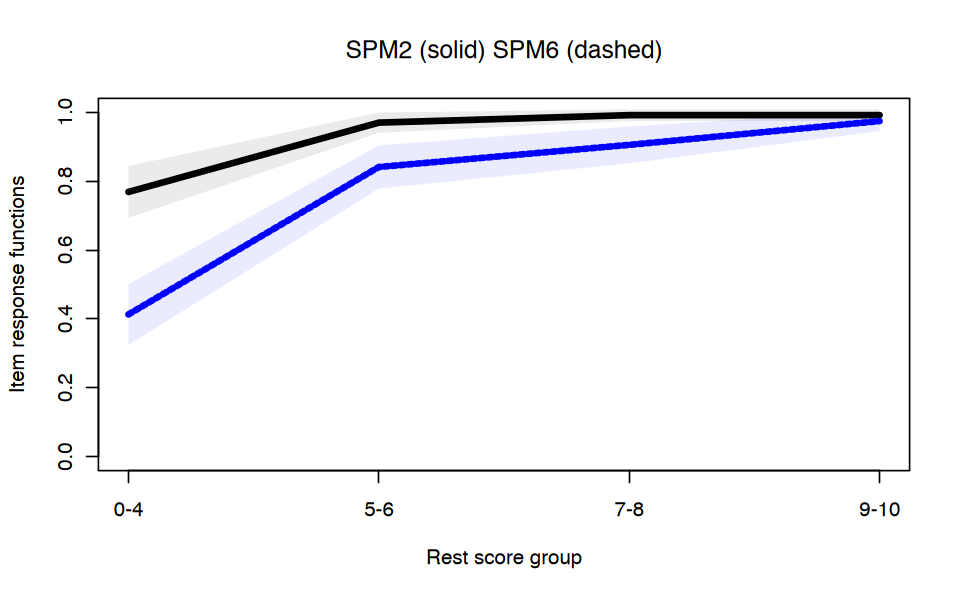

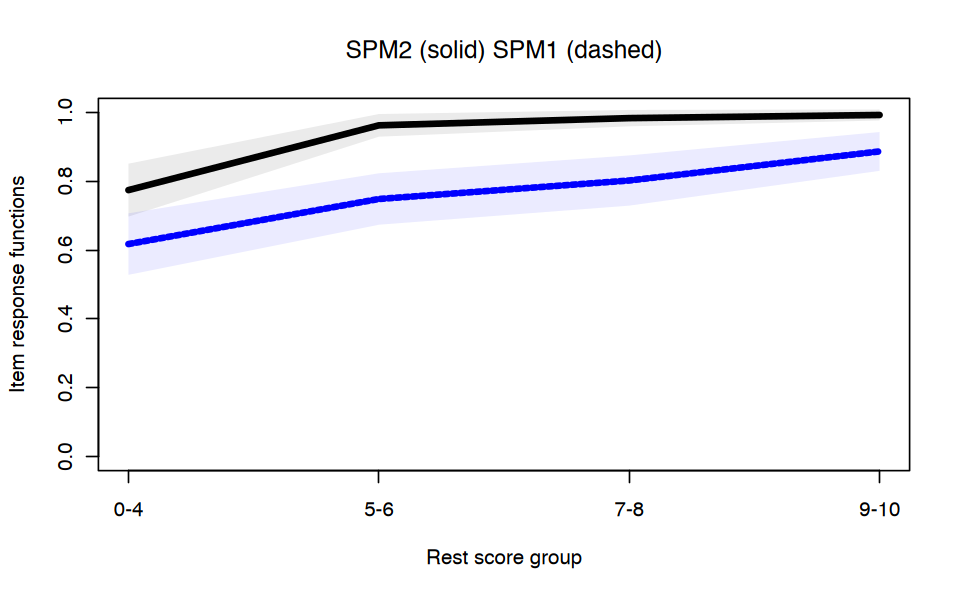

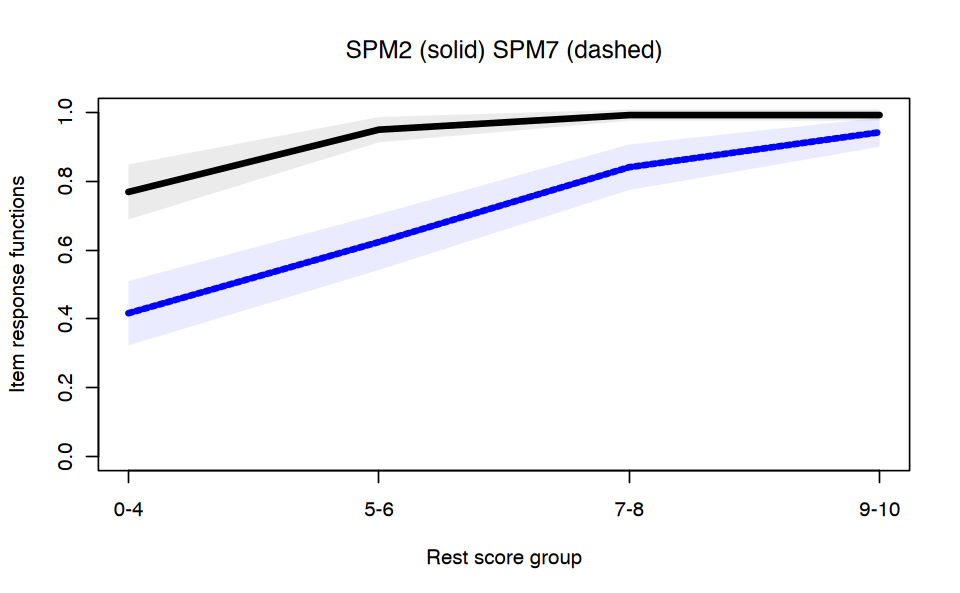

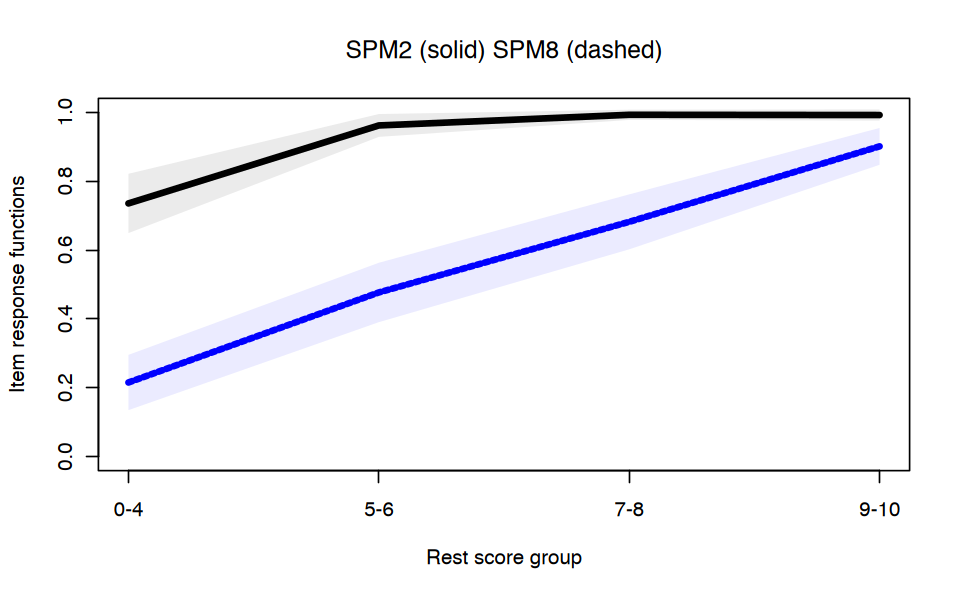

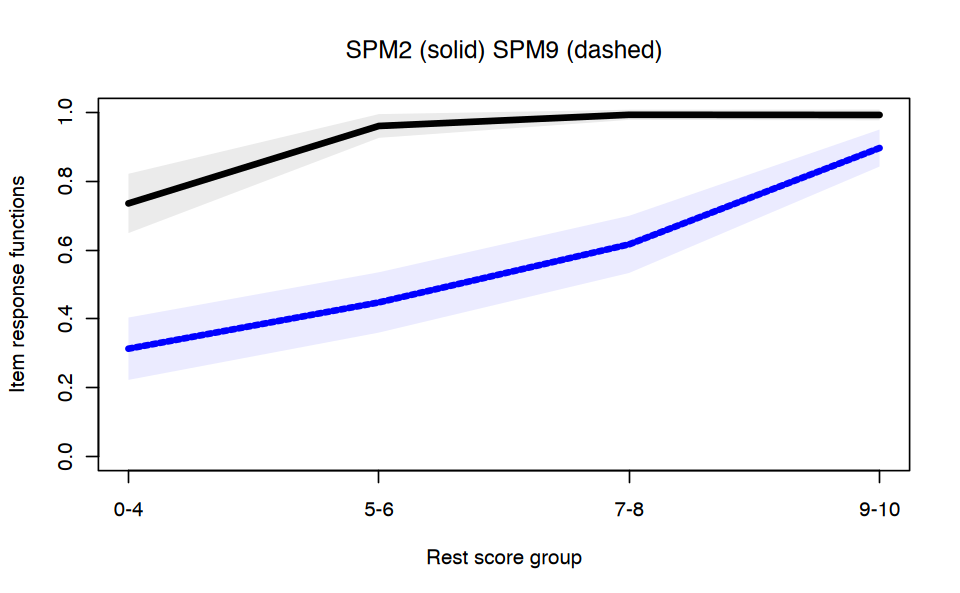

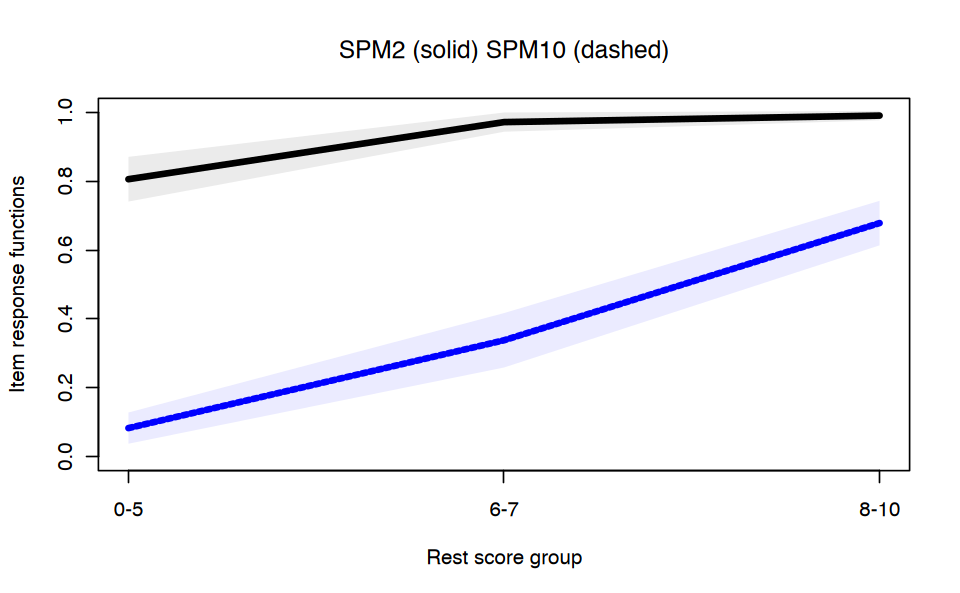

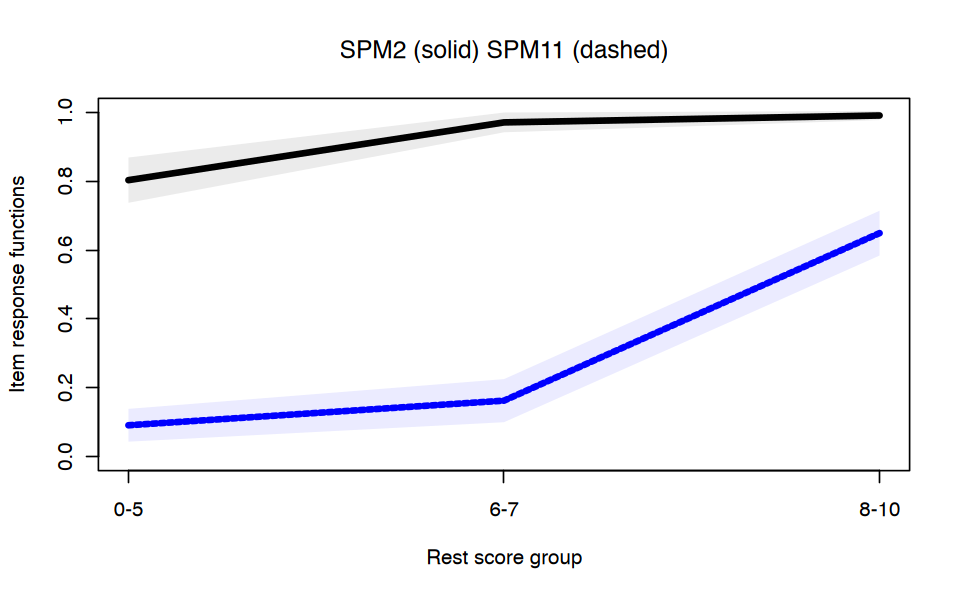

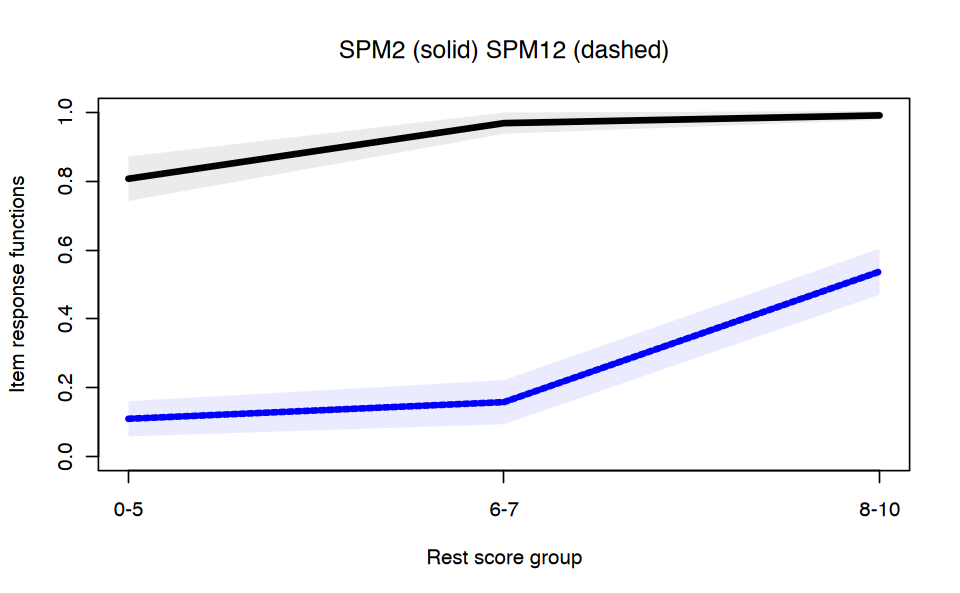

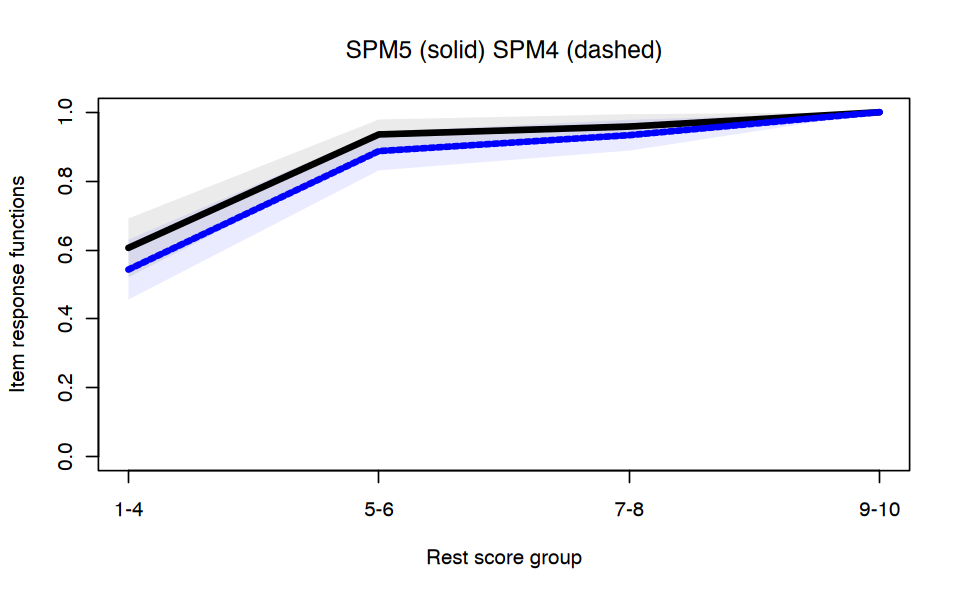

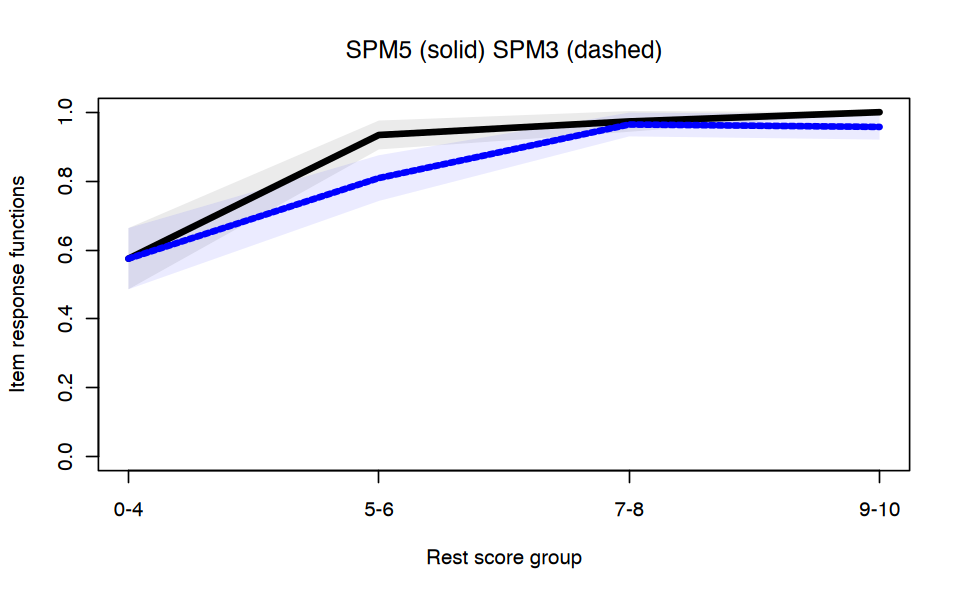

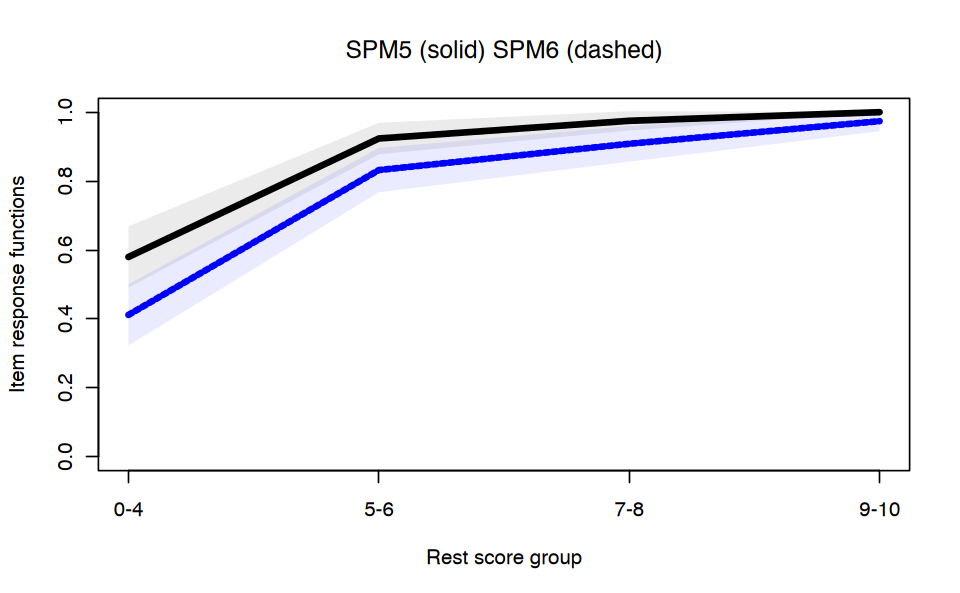

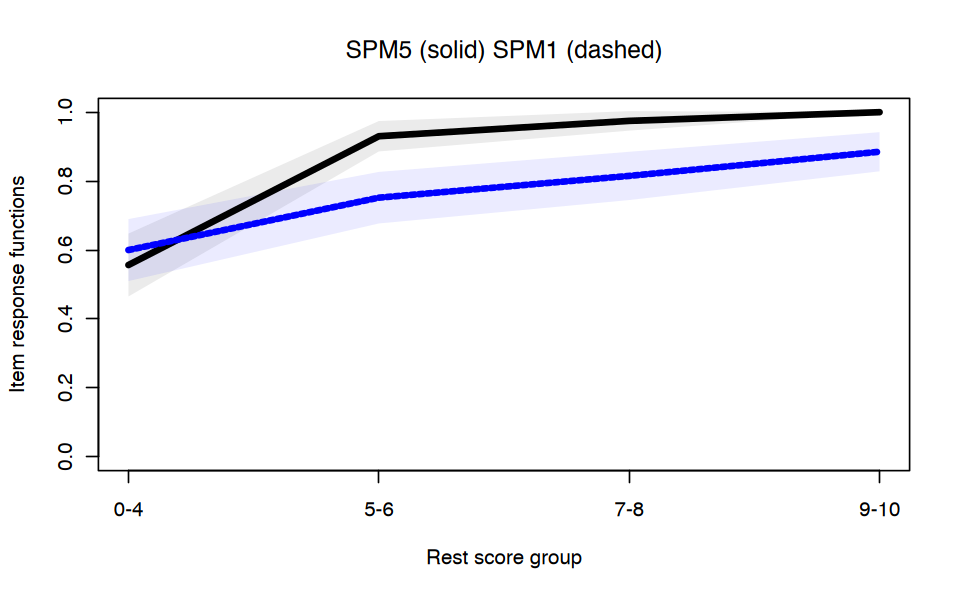

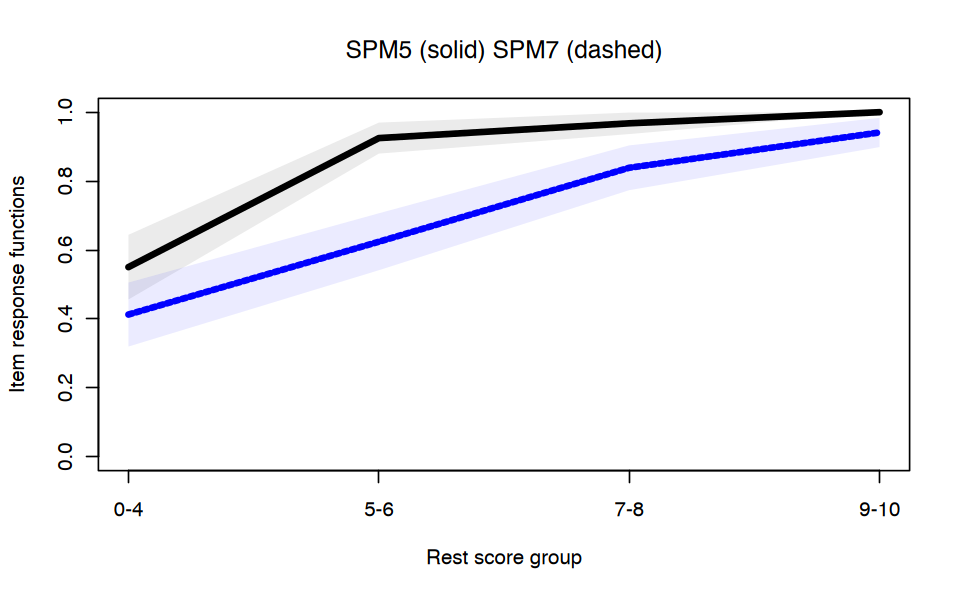

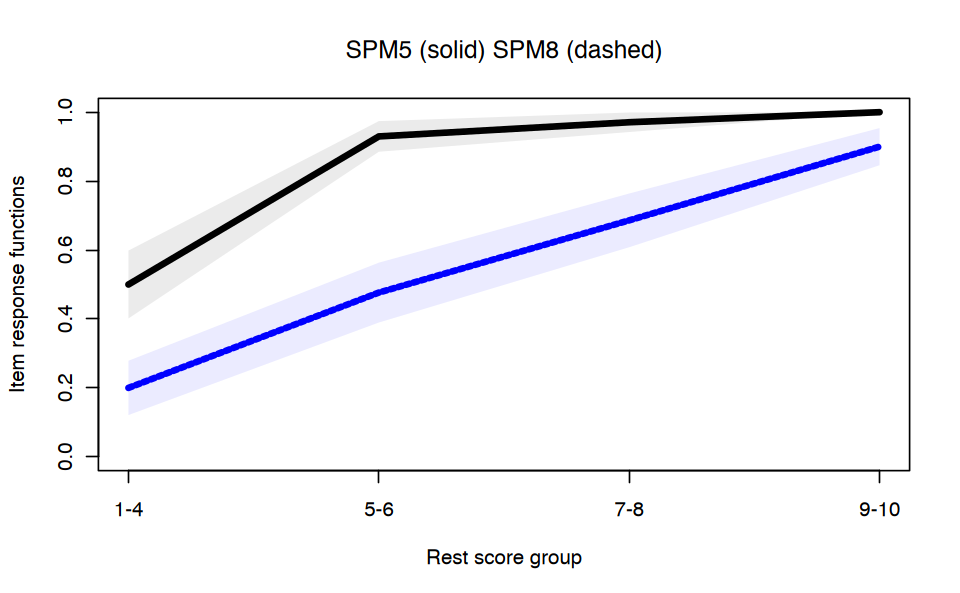

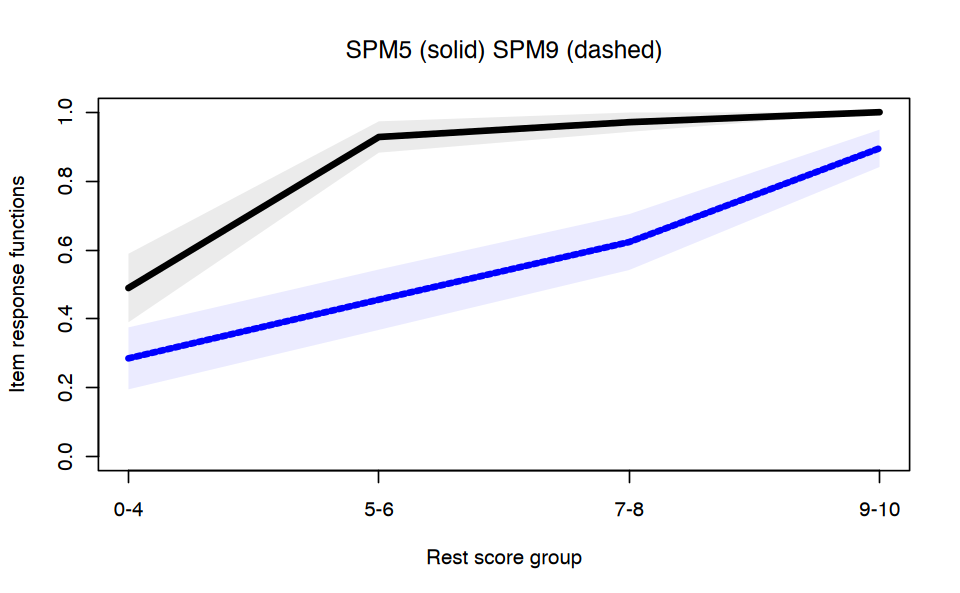

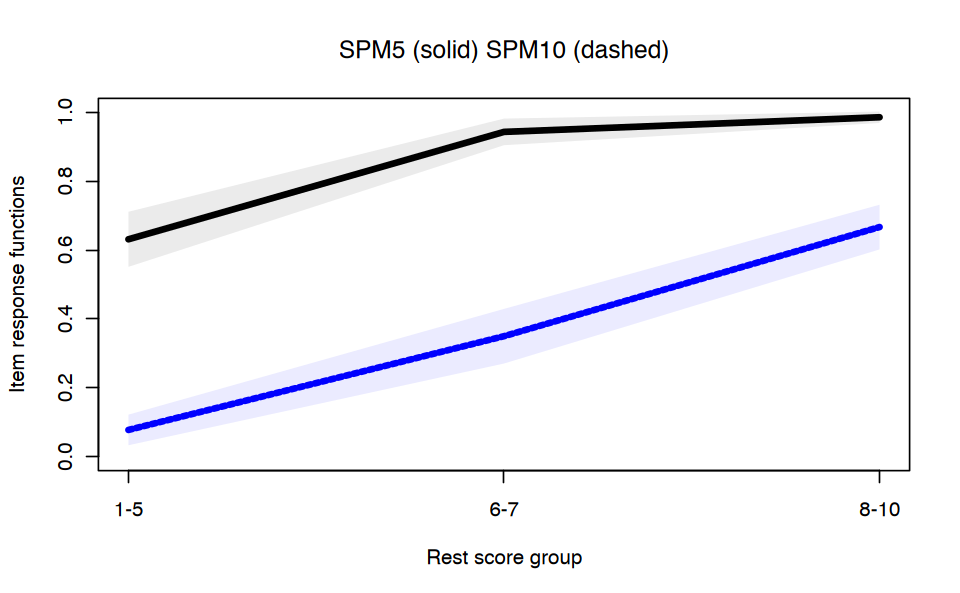

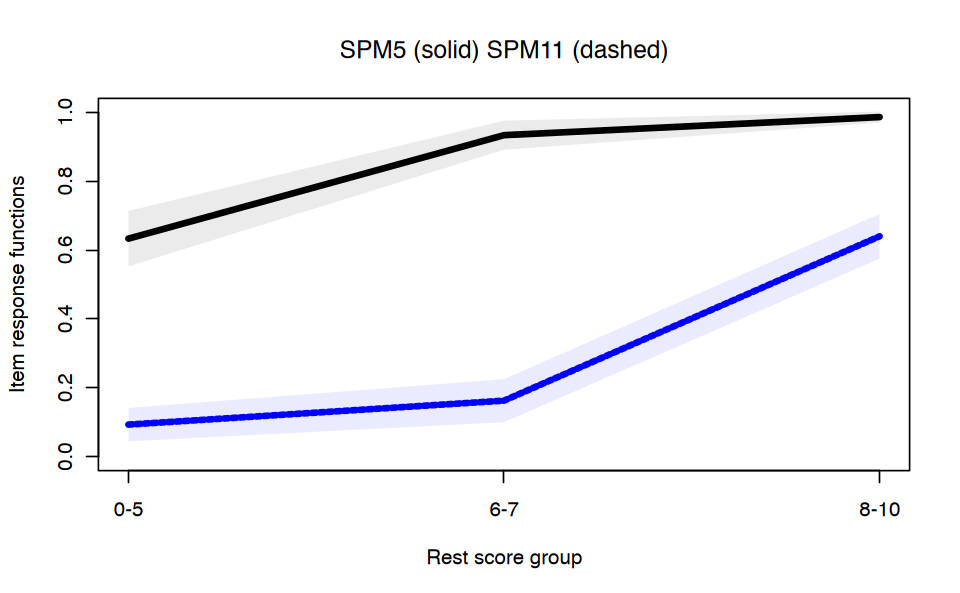

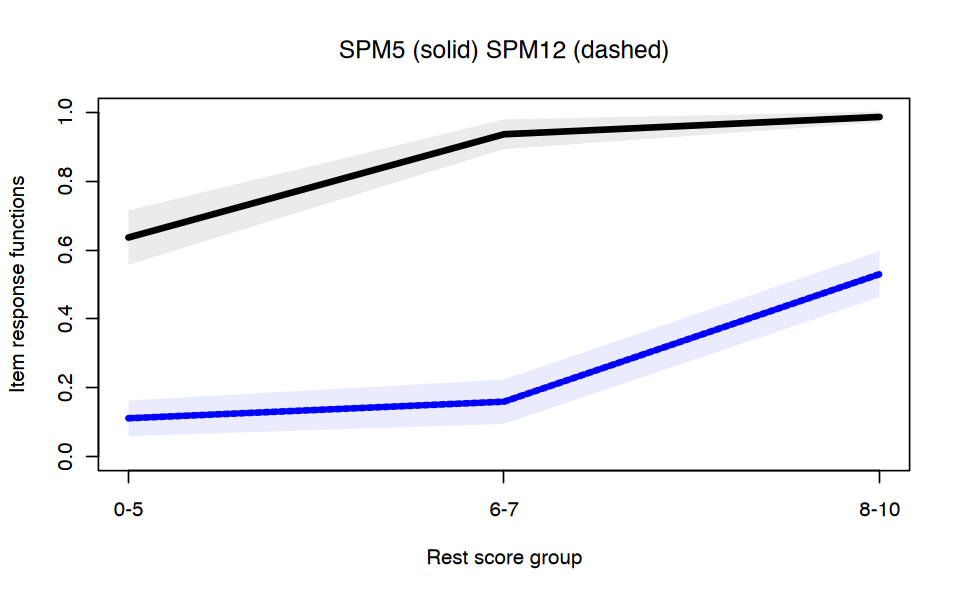

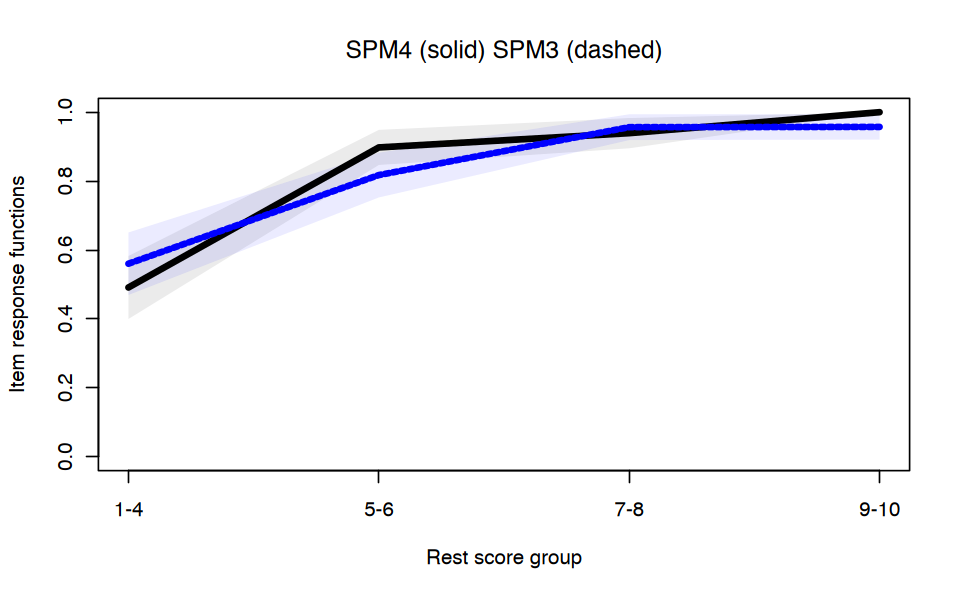

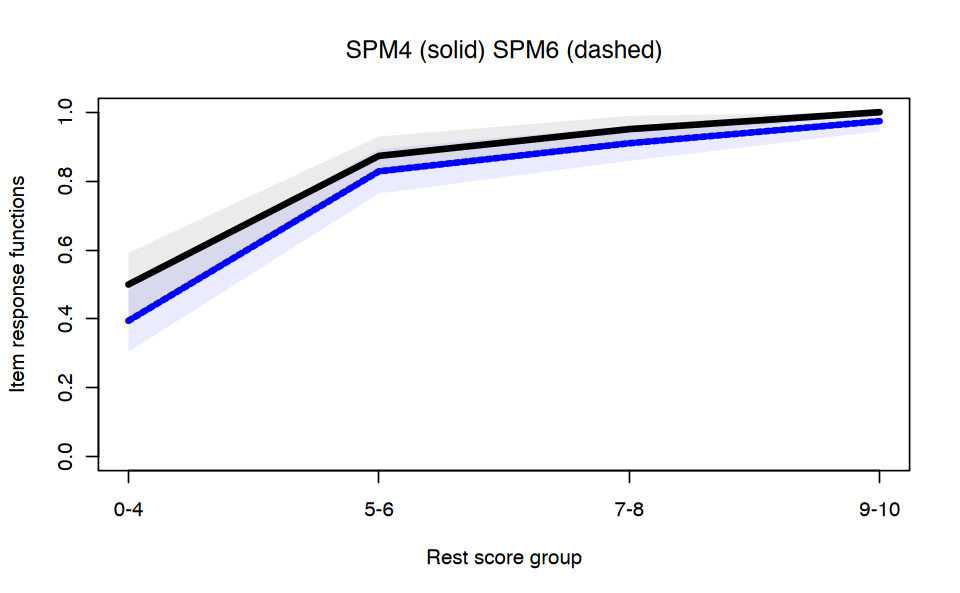

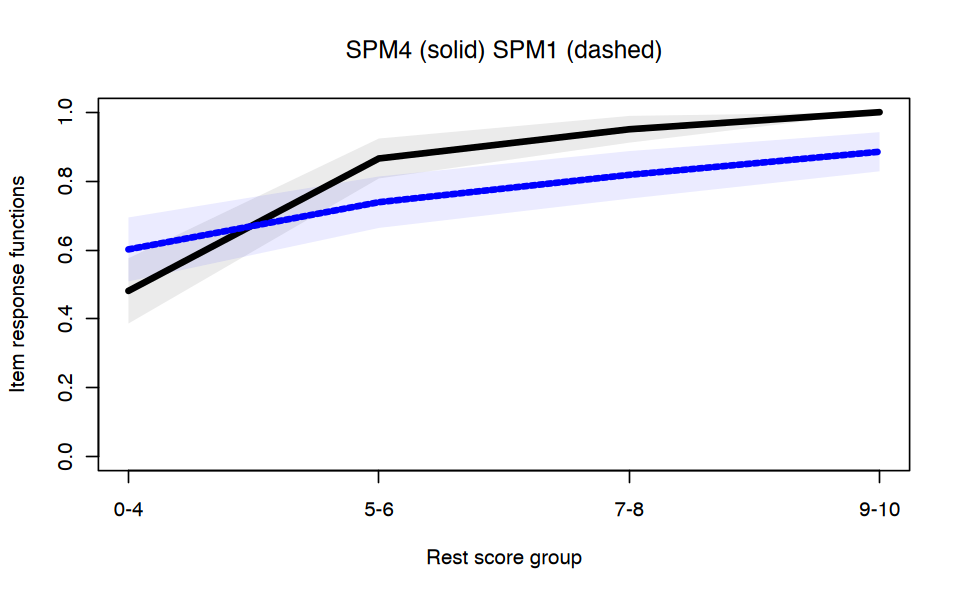

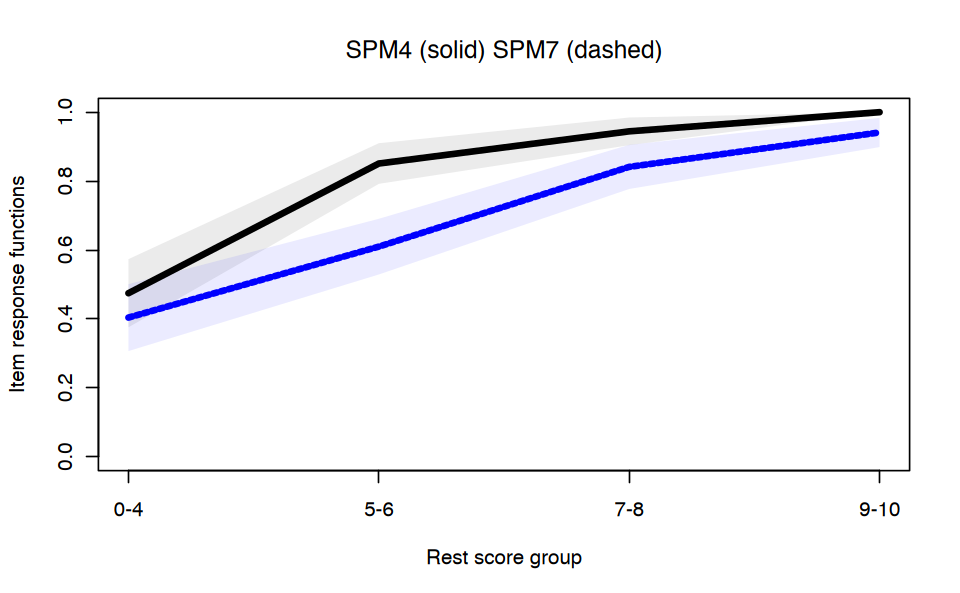

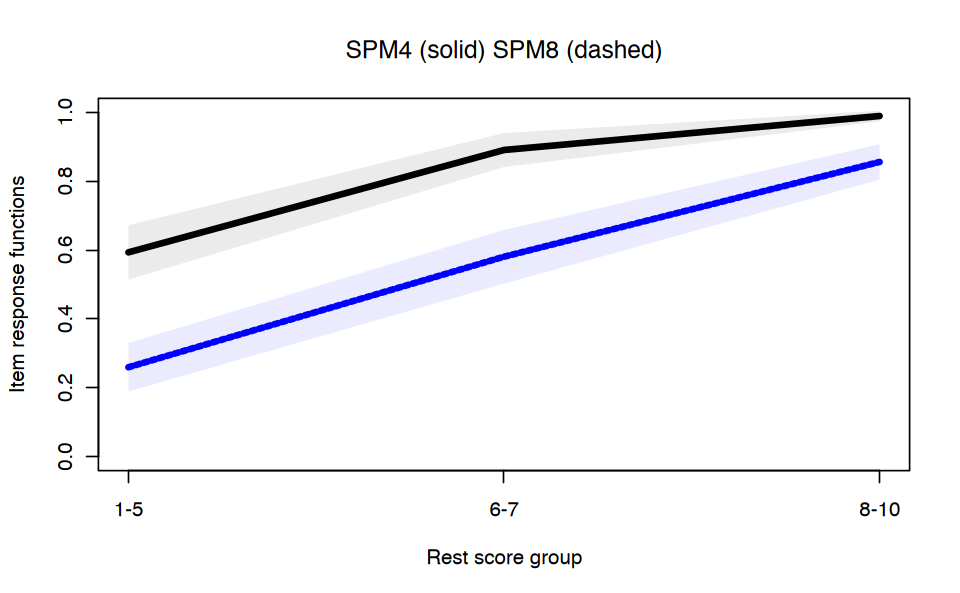

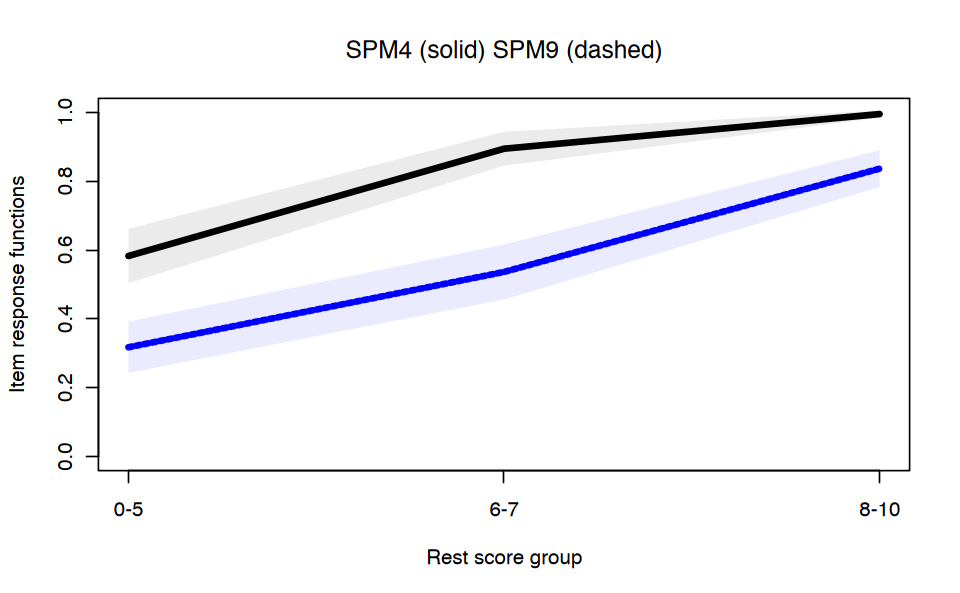

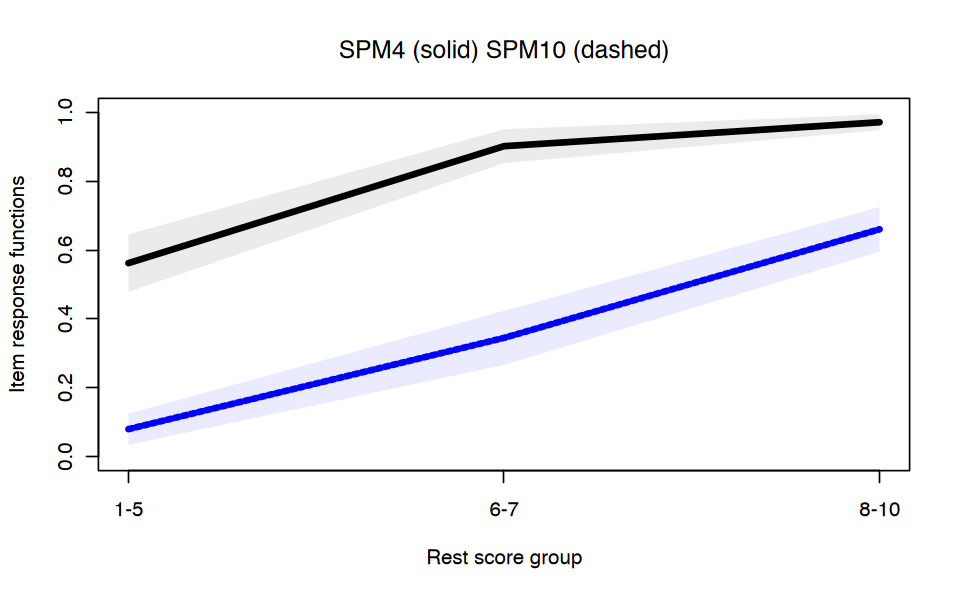

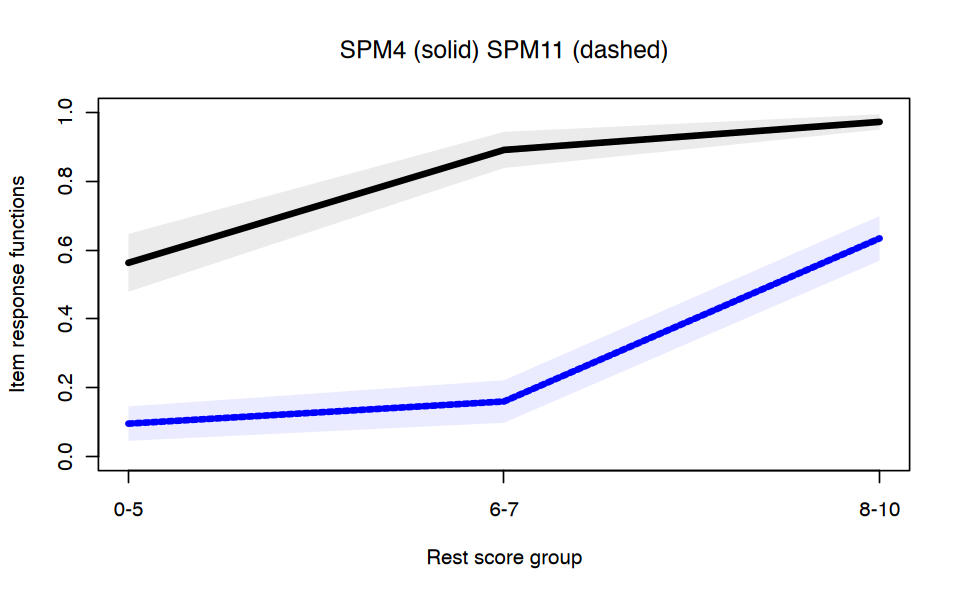

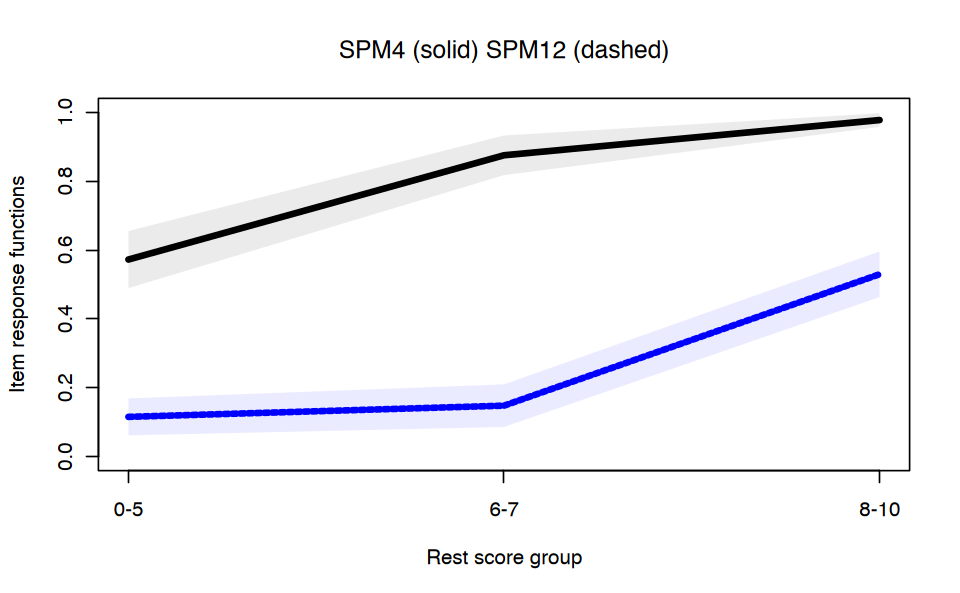

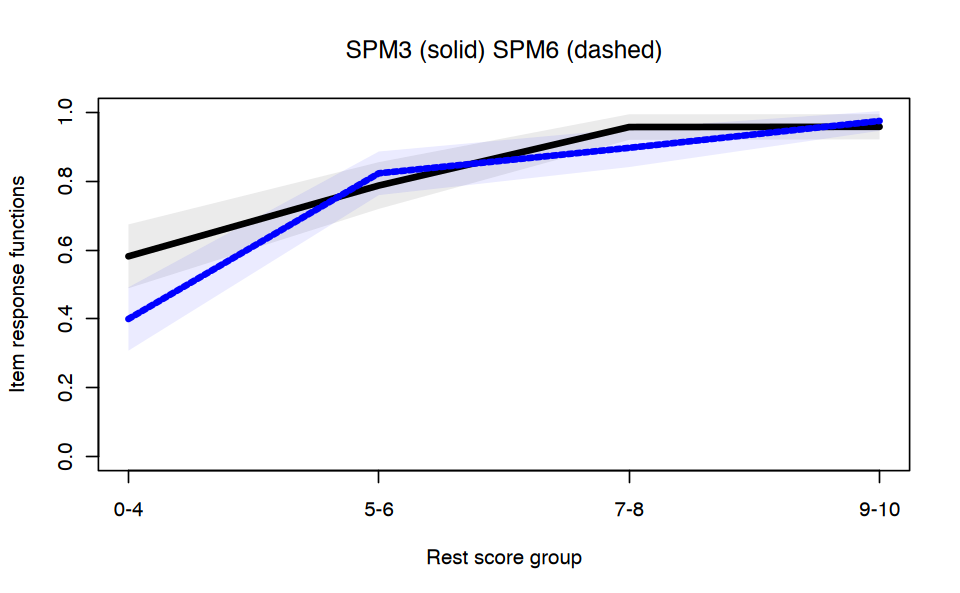

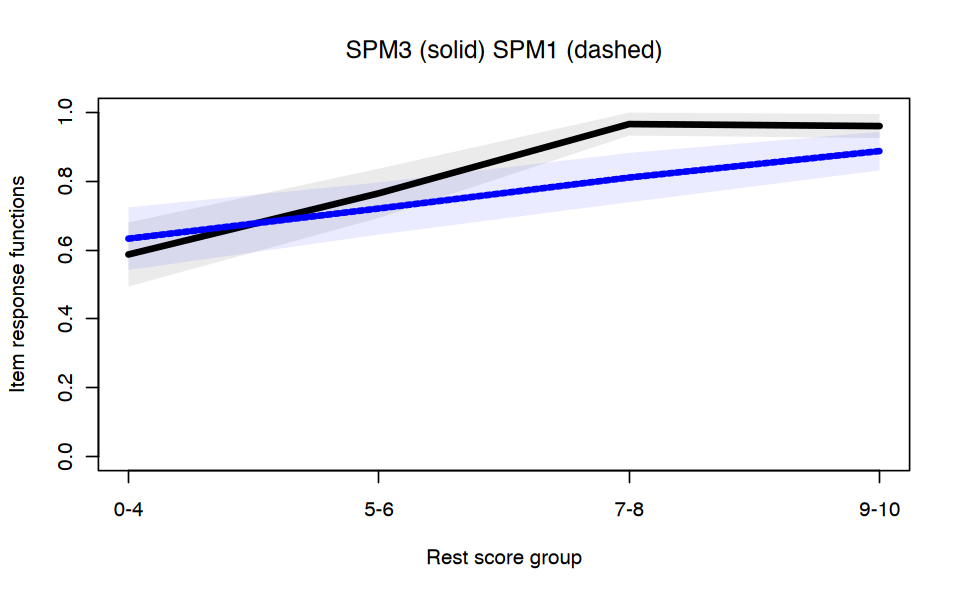

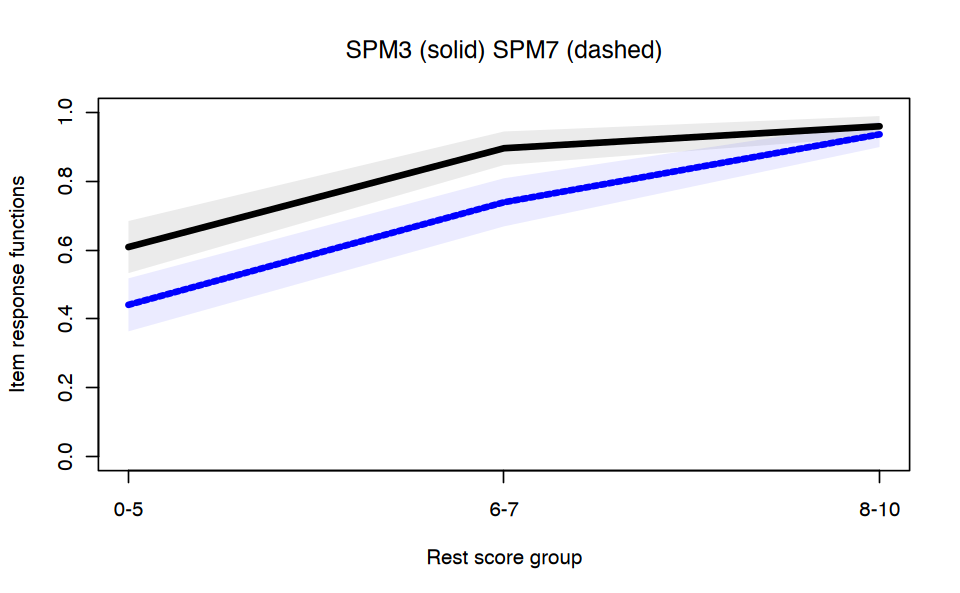

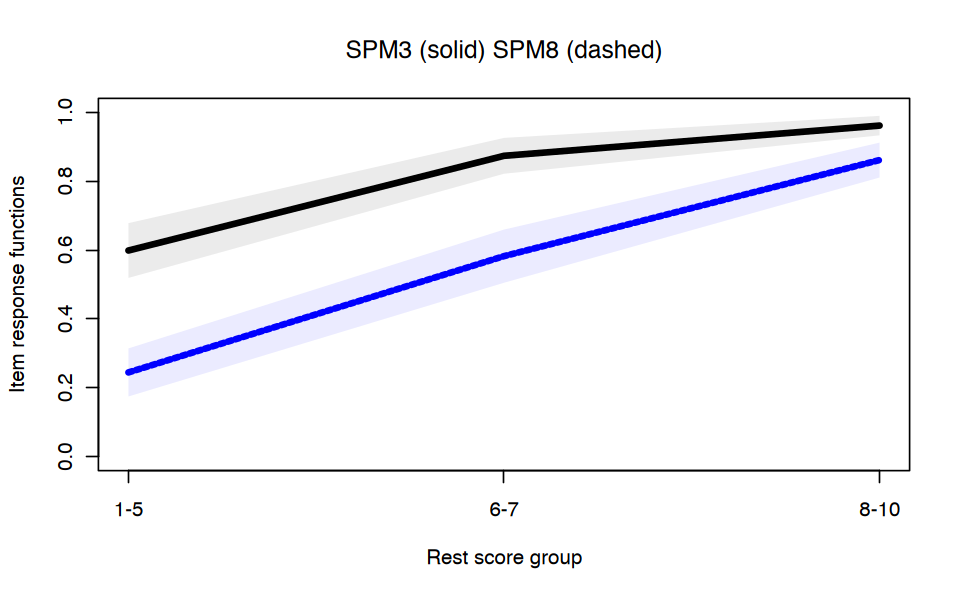

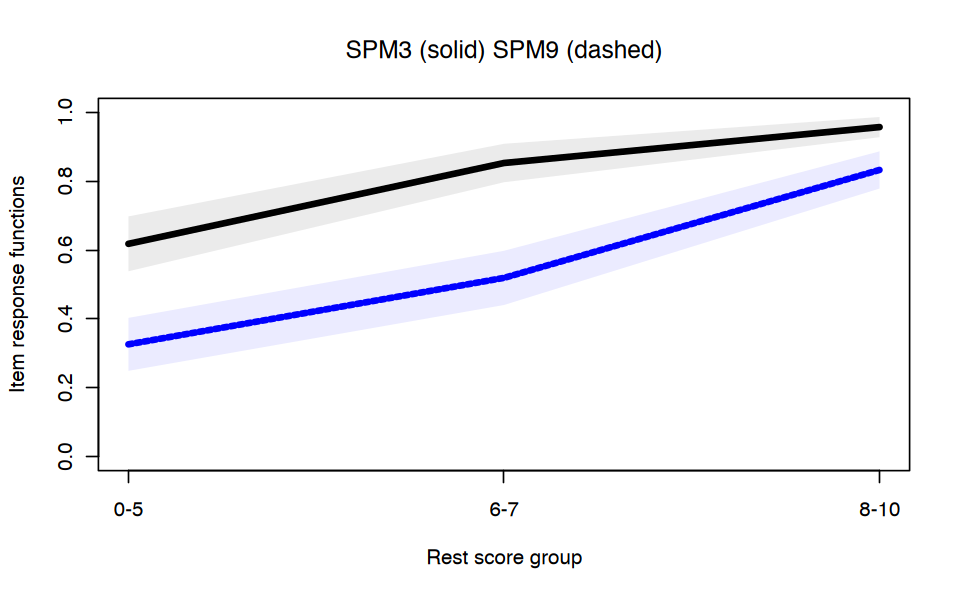

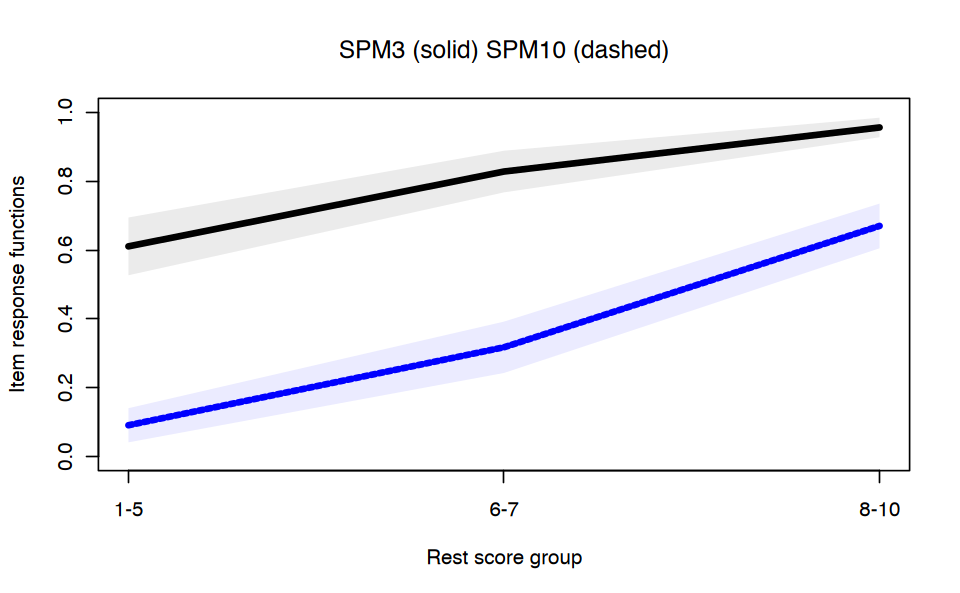

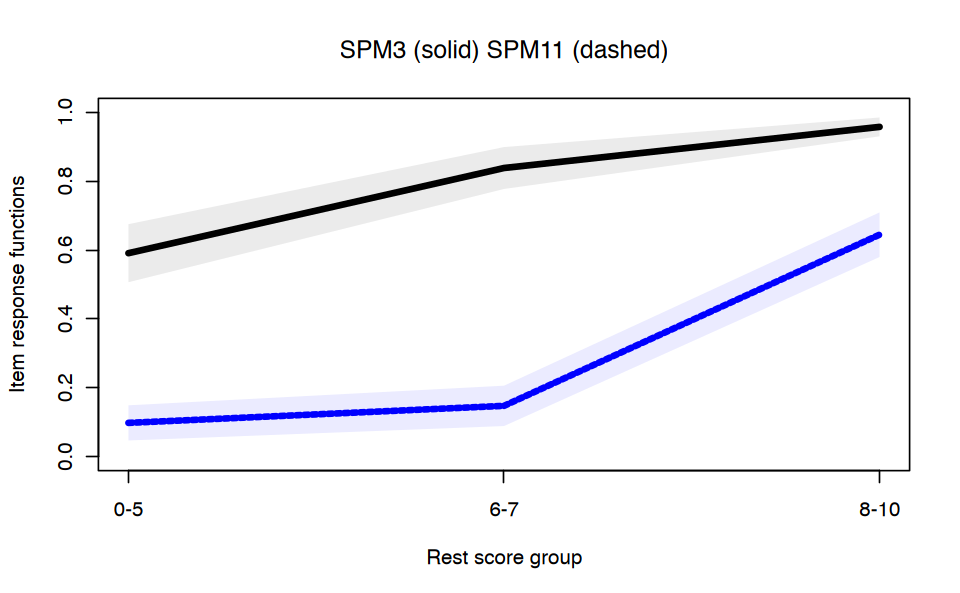

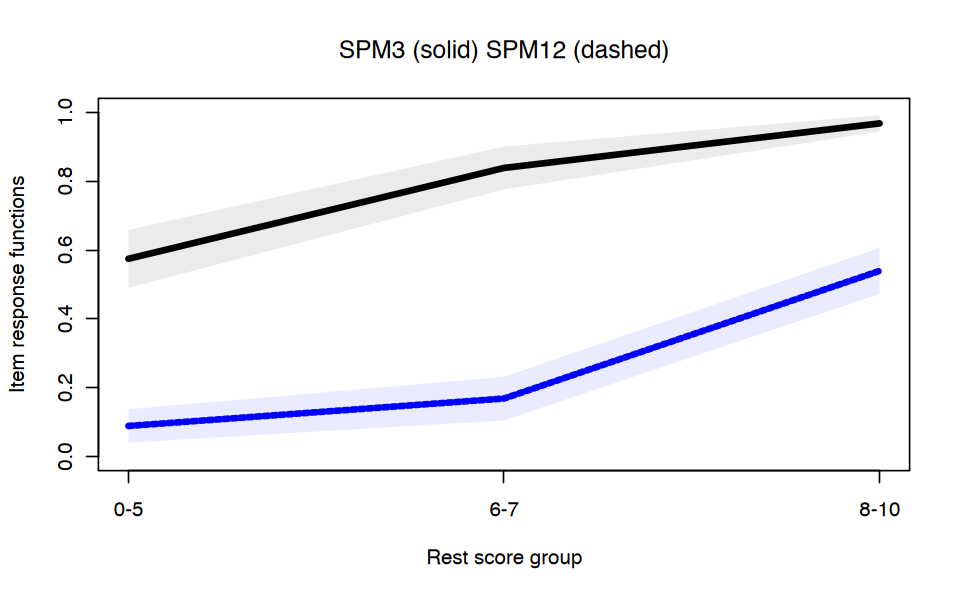

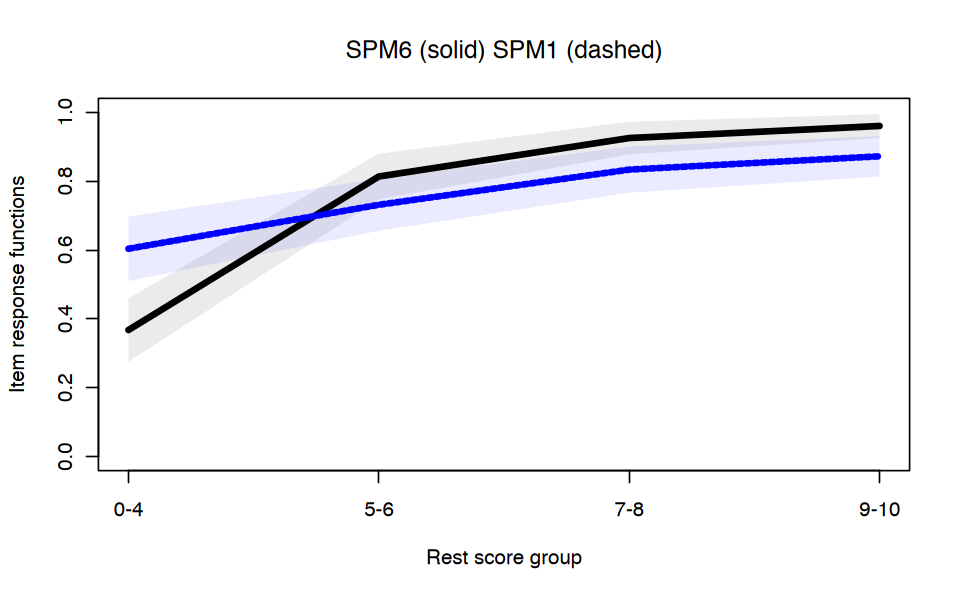

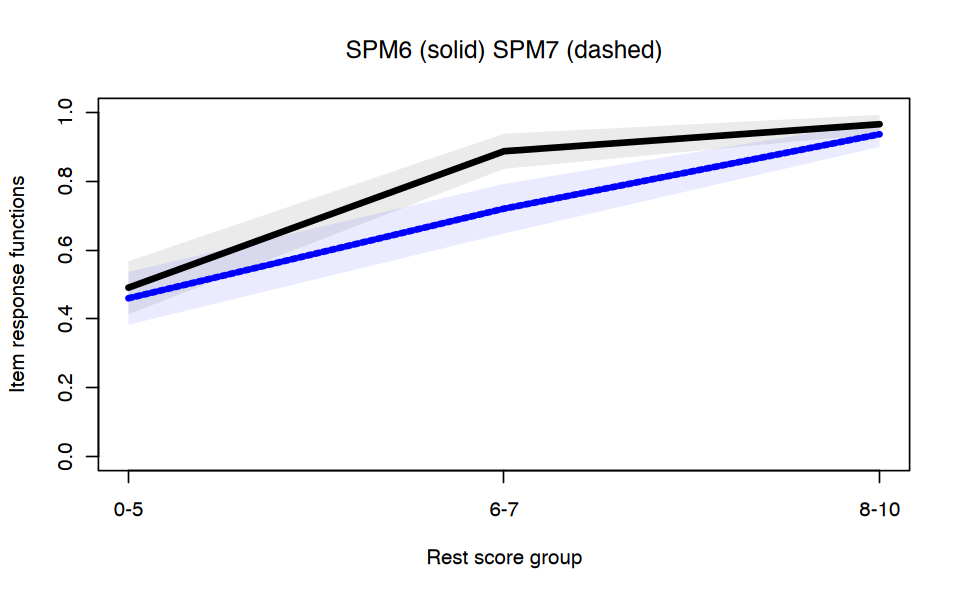

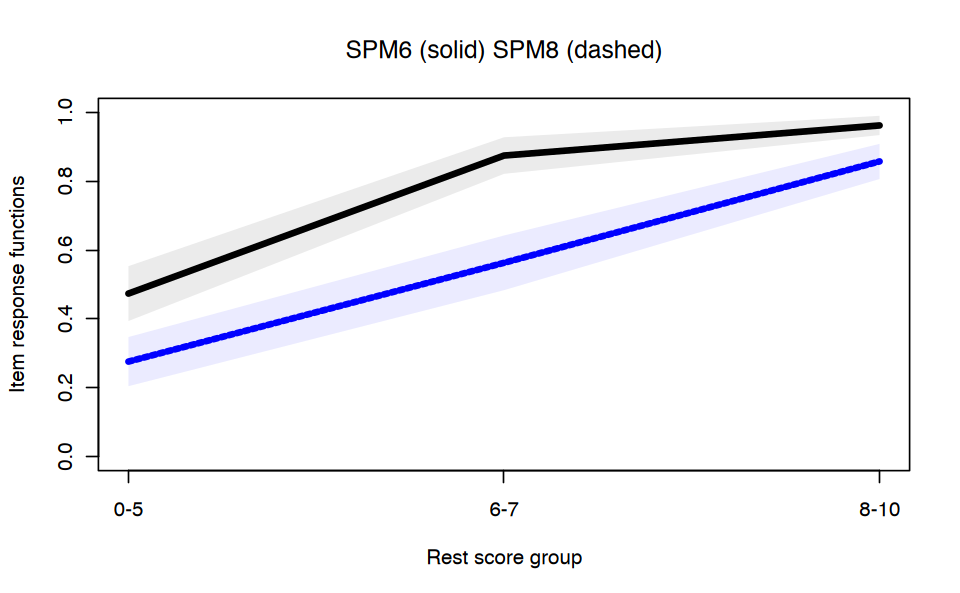

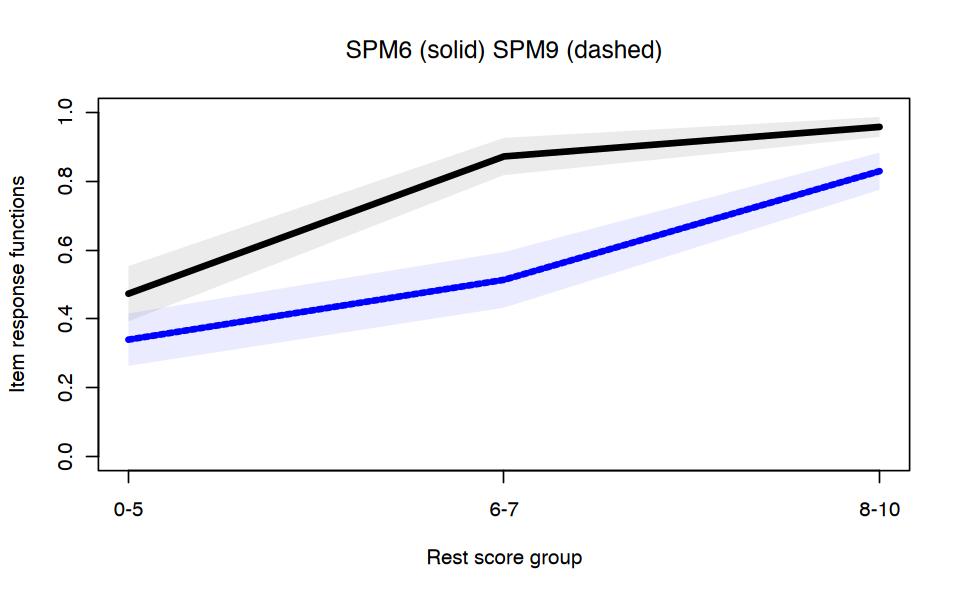

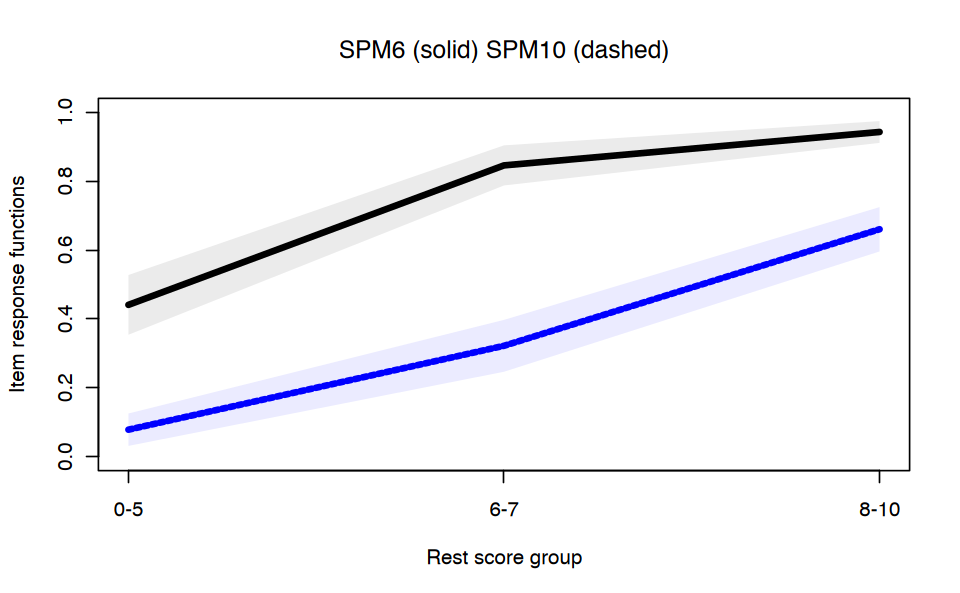

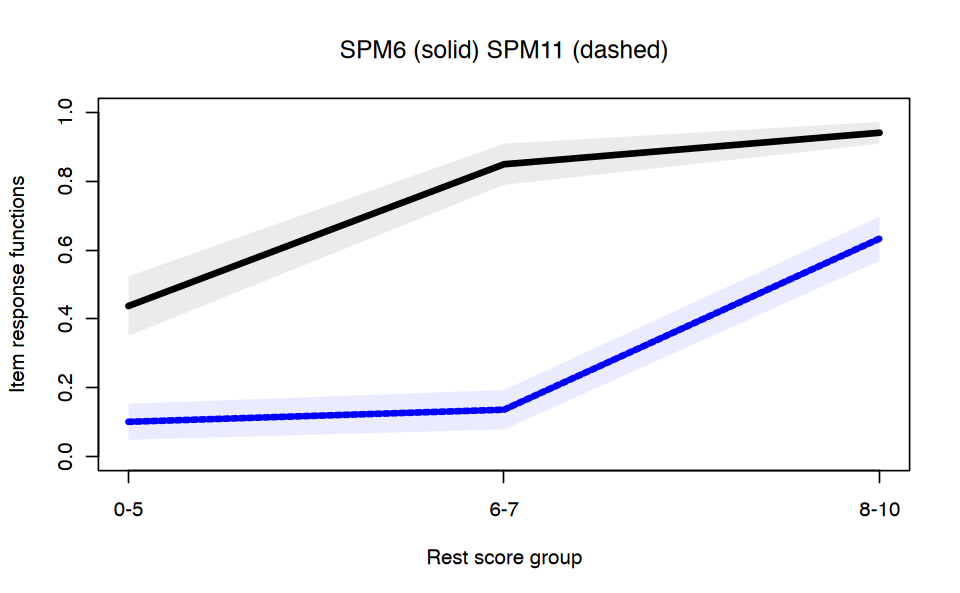

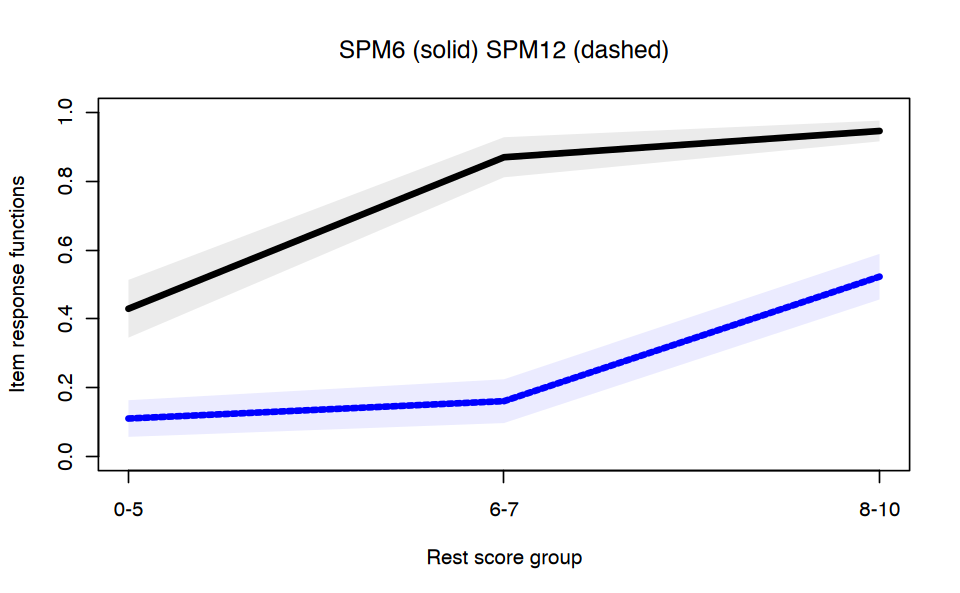

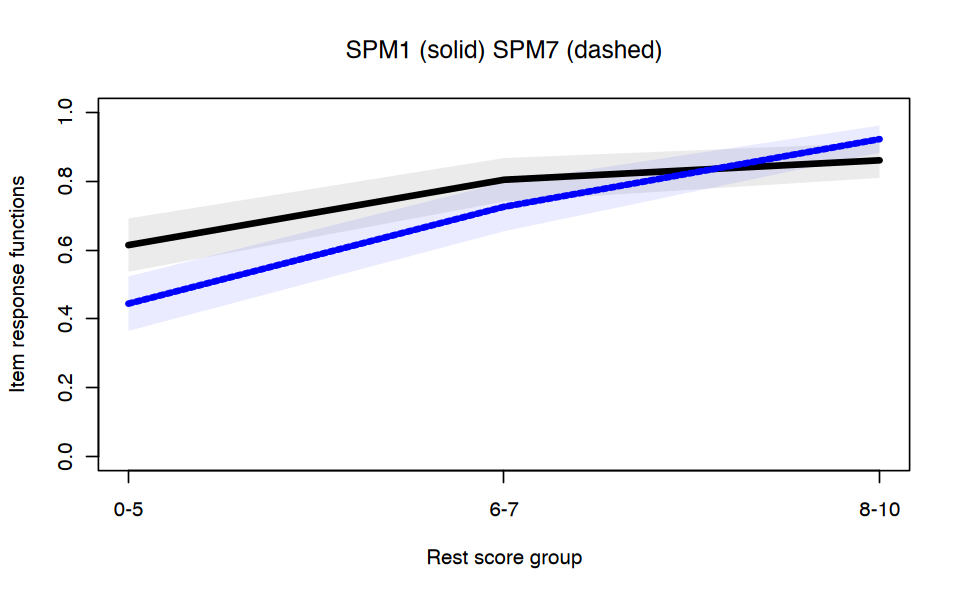

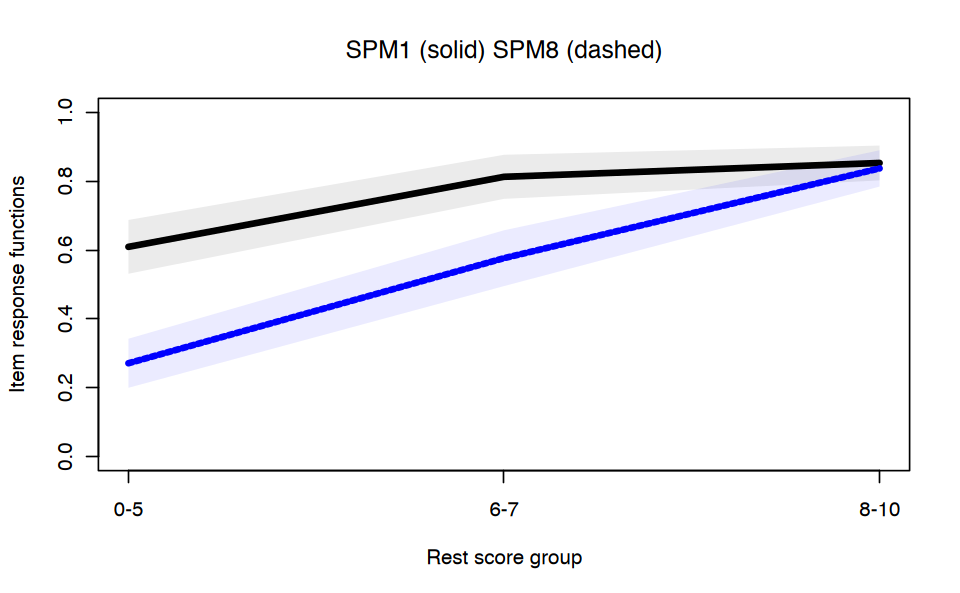

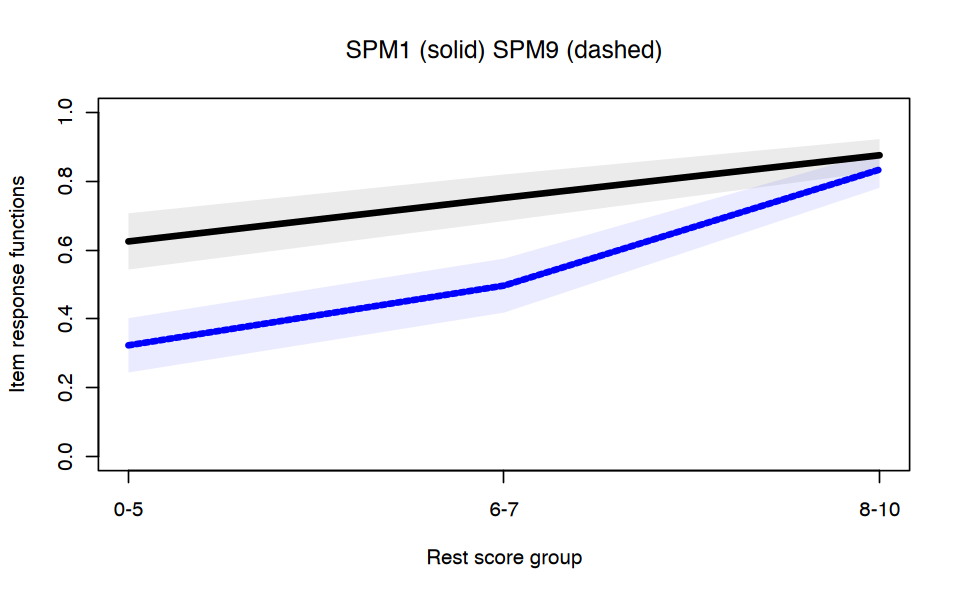

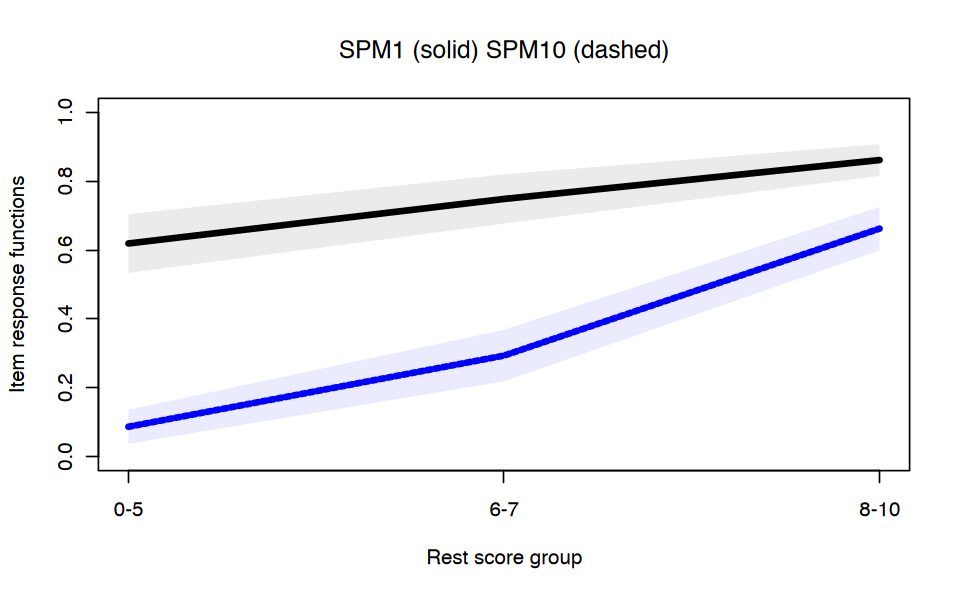

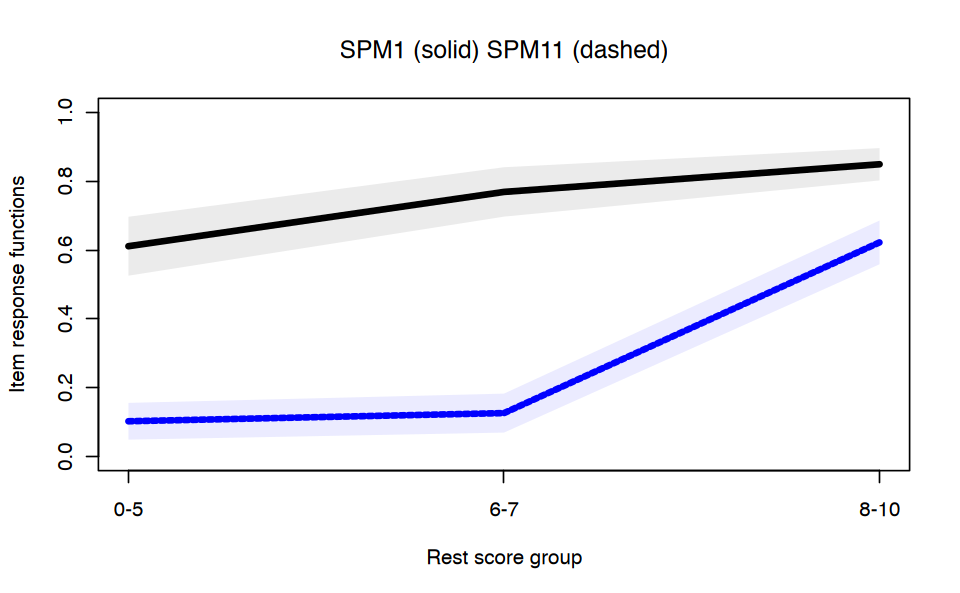

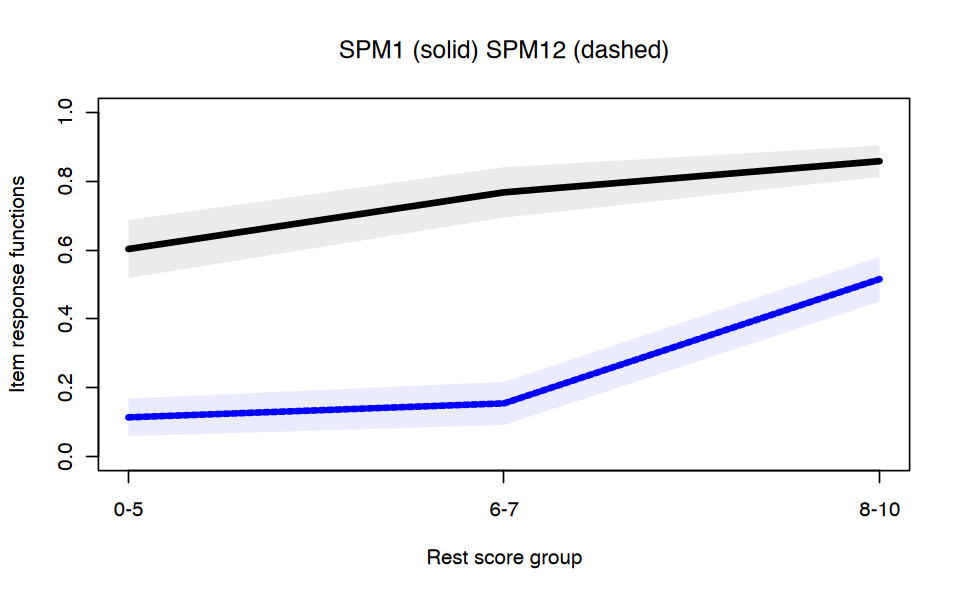

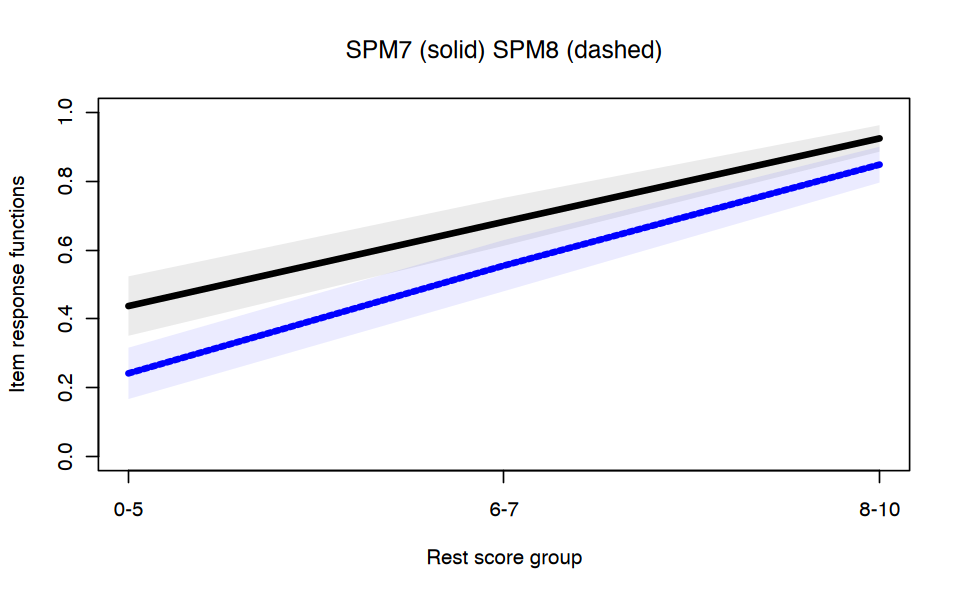

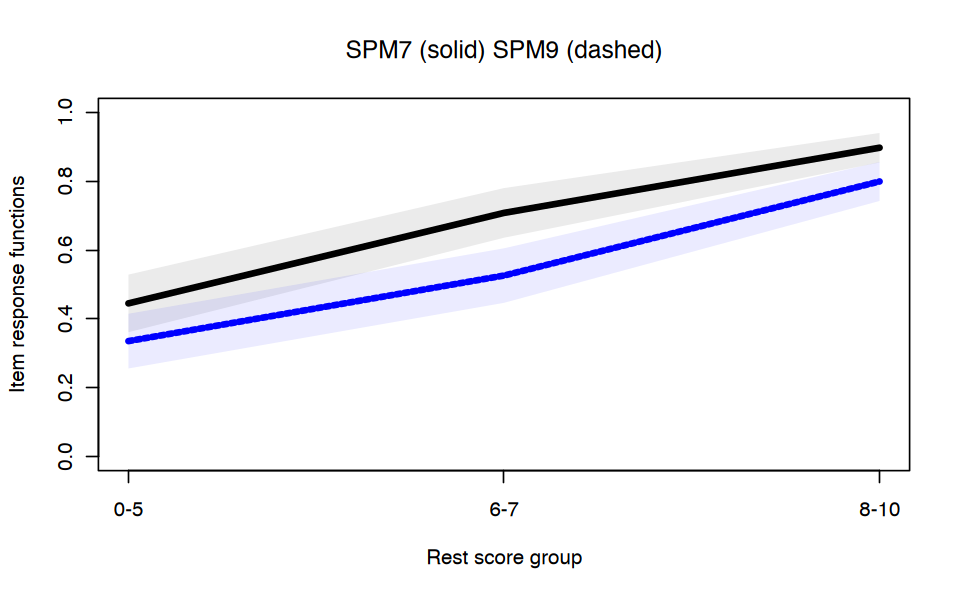

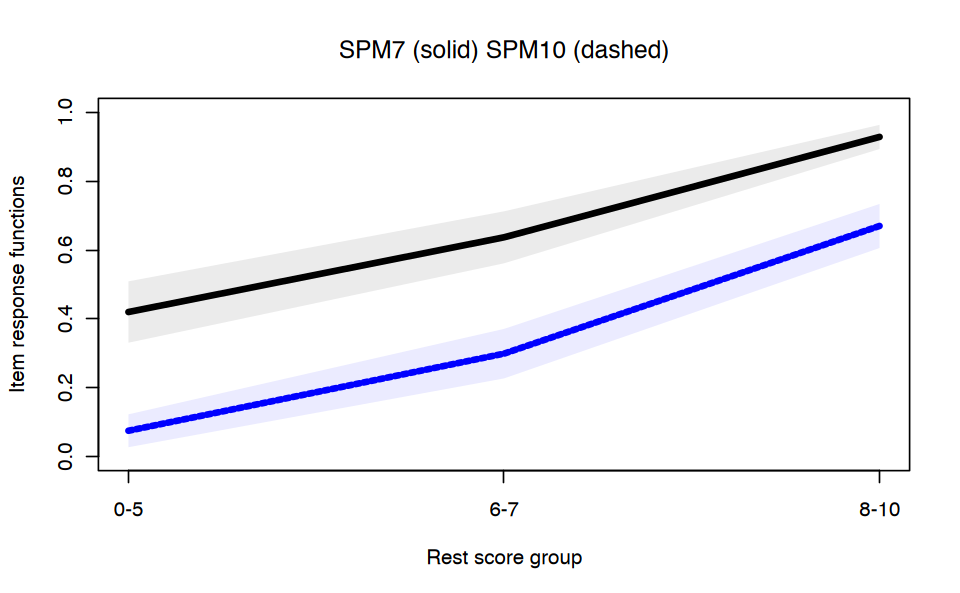

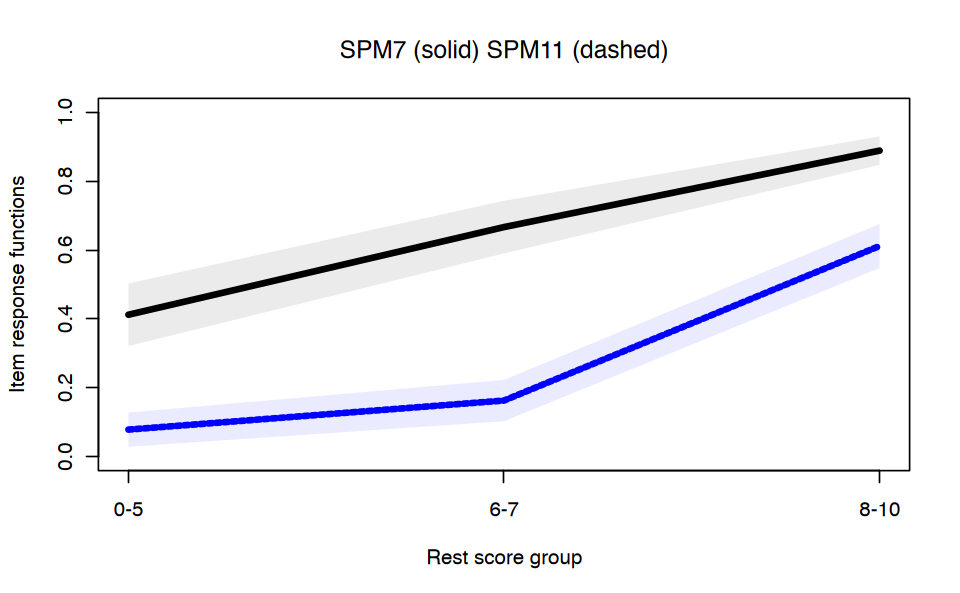

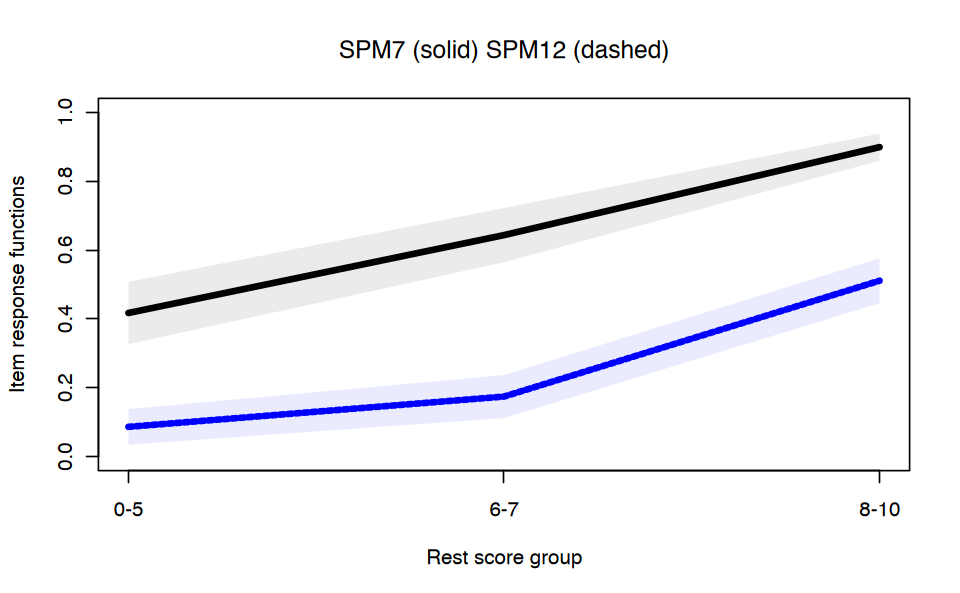

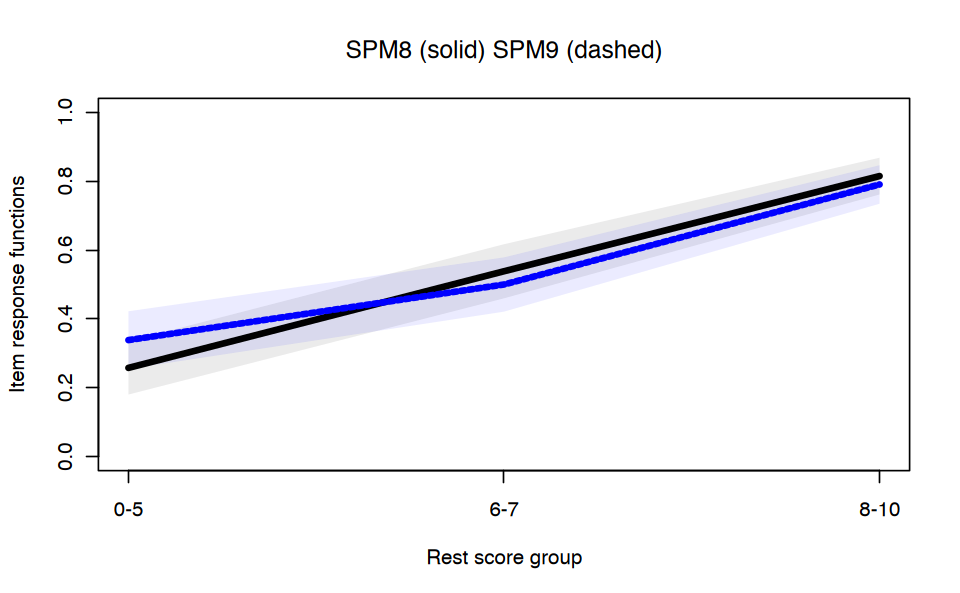

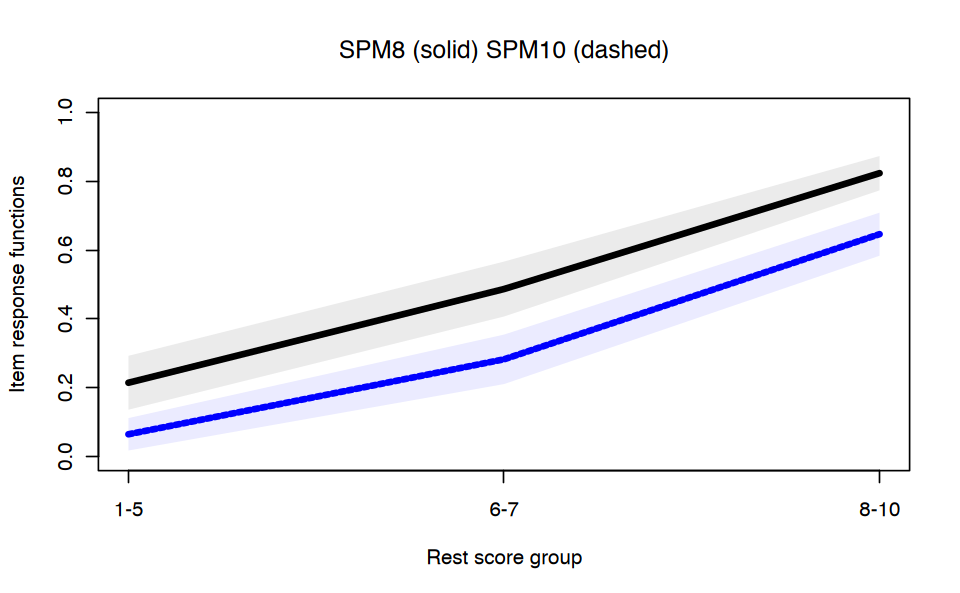

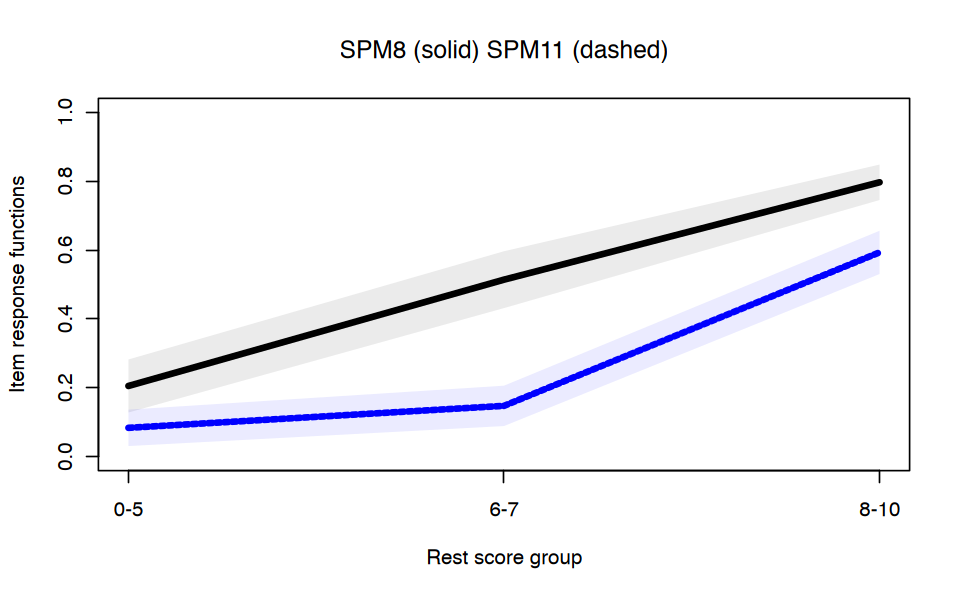

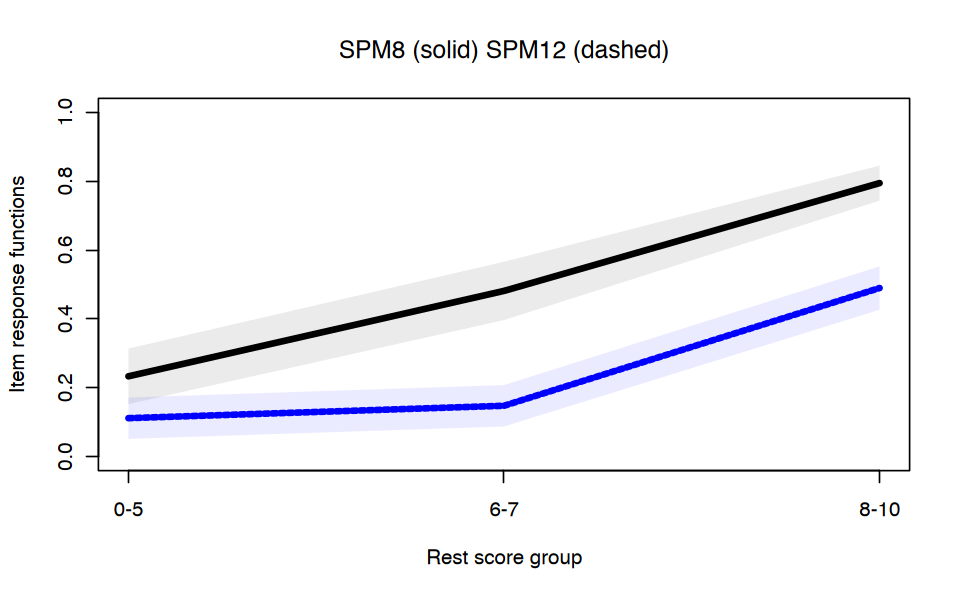

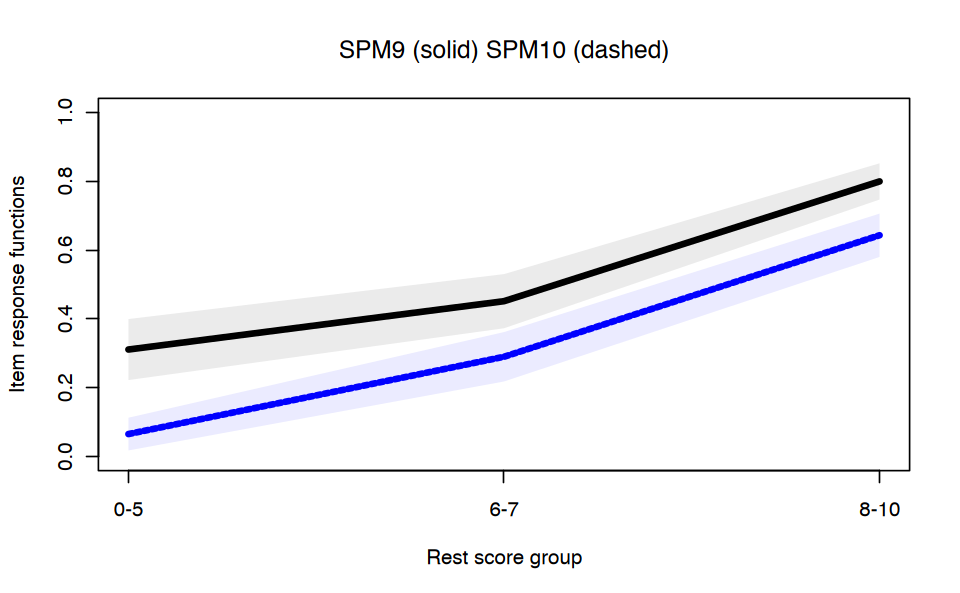

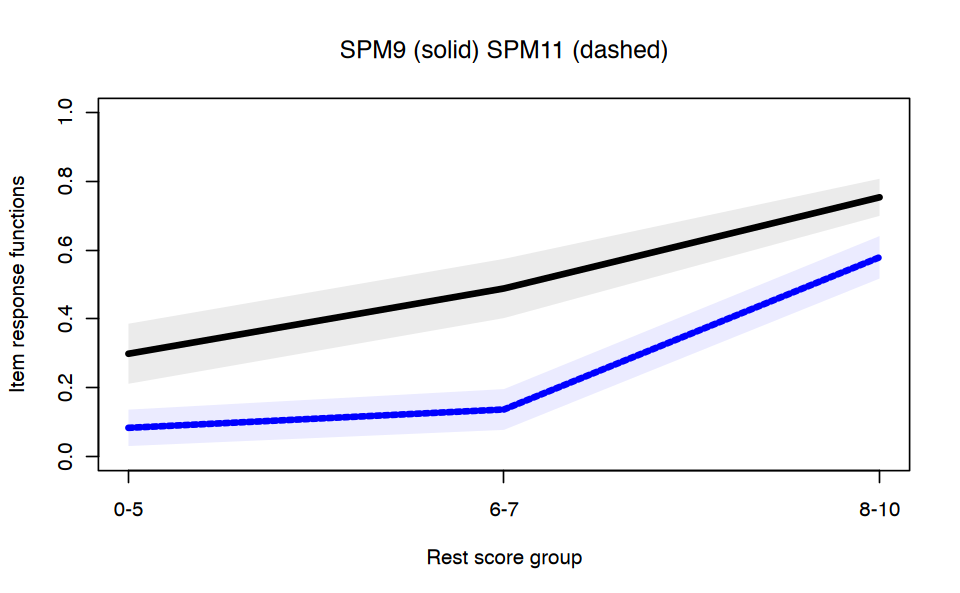

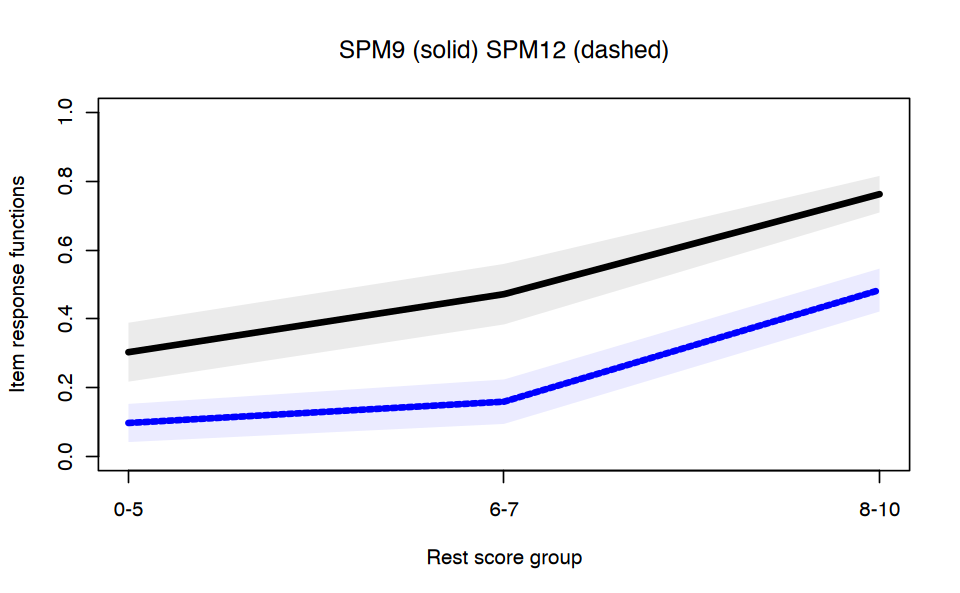

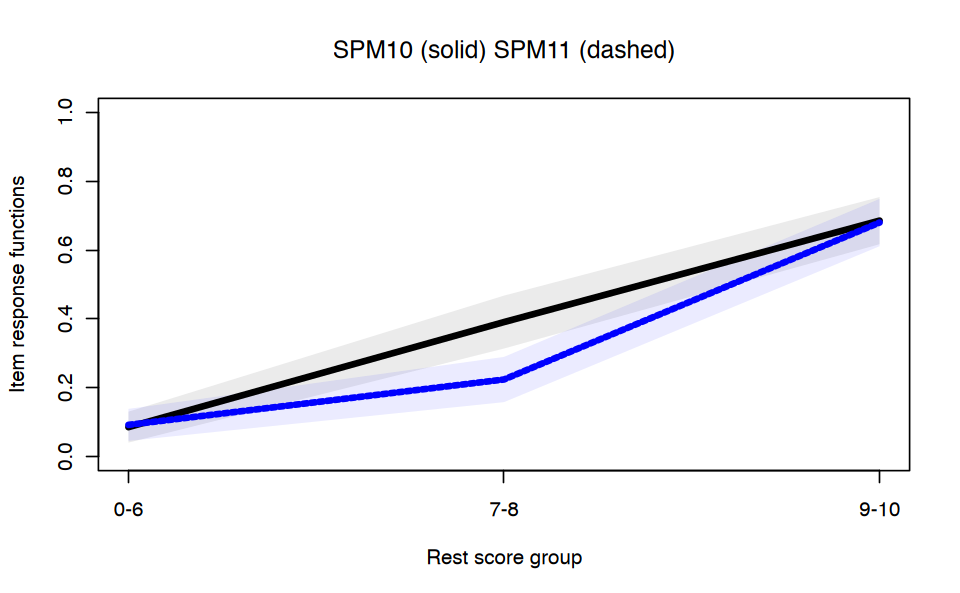

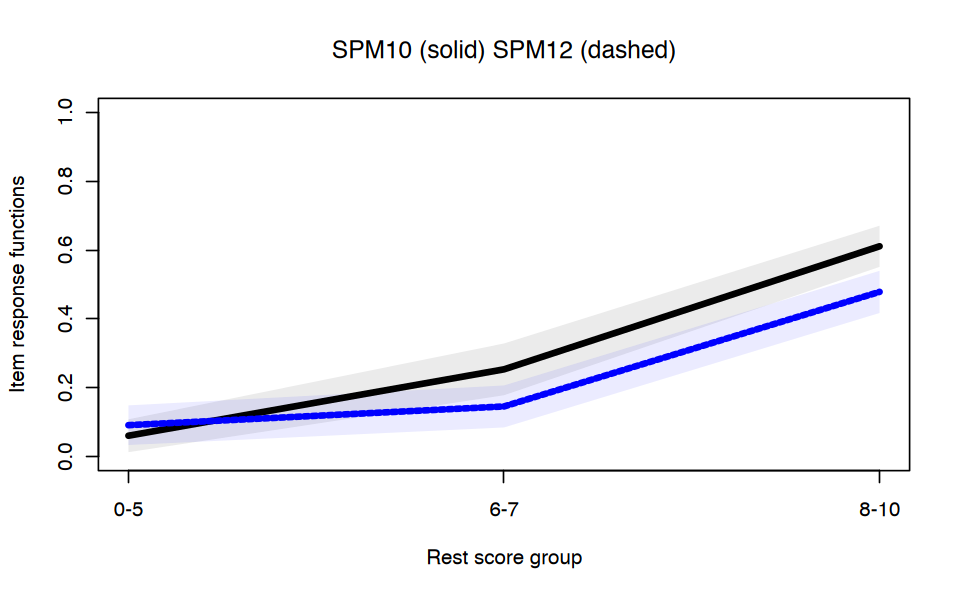

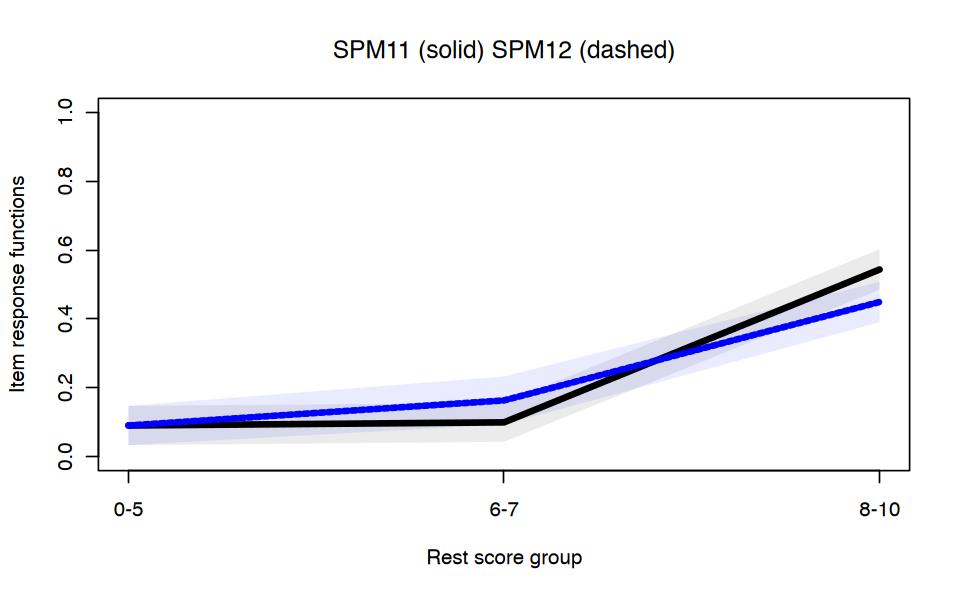

In [69]:
plot(iio)

In [70]:
check.reliability(spm_clean, LCRC = TRUE)

$MS
[1] 0.8364933

$alpha
[1] 0.8136746

$lambda.2
[1] 0.8196203

$LCRC
[1] 0.8780043